### 1. Description of basic data preprocessing steps.( Data cleaning, Standardization,Normalization, data splitting) 
### Basic steps
* <b>Step 1 :</b> Import the libraries
* <b>Step 2 :</b> Import the data-set
* <b>Step 3 :</b> Check out the missing values
* <b>Step 4 :</b> See the Categorical Values
* <b>Step 5 :</b> Splitting the data-set into Training and Test Set

### Data cleaning:
* The main aim of Data Cleaning is to identify and remove errors & duplicate data,in order to create a reliable dataset. 
* This improves the quality of the training data for analytics and enables accurate decision-making.
* Needless to say, data cleansing is a time-consuming process and most data scientists spend an enormous amount of time in enhancing the quality of the data. However, there are various methods to identify and classify data for data cleansing.
* There are mainly two distinct techniques, namely Qualitative and Quantitative techniques to classify data errors. 
* Qualitative techniques involve rules, constraints, and patterns to identify errors.
* On the other hand, Quantitative techniques employ statistical techniques to identify errors in the trained data.

### Normalisation:
* Normalization is a scaling technique in which values are shifted and rescaled so that they end up ranging between 0 and 1. It is also known as Min-Max scaling.
* Here’s the formula for normalization:

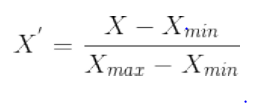
* Here, Xmax and Xmin are the maximum and the minimum values of the 
feature respectively.
    * When the value of X is the minimum value in the column, the numerator 
will be 0, and hence X’ is 0
    * On the other hand, when the value of X is the maximum value in the 
column, the numerator is equal to the denominator and thus the value 
of X’ is 1
    * If the value of X is between the minimum and the maximum value, then 
the value of X’ is between 0 and 1

### Standardisation:
* Standardization is another scaling technique where the values are centered around the mean with a unit standard deviation. 
* This means that the mean of the attribute becomes zero and the resultant distribution has a unit standard deviation.
* Here’s the formula for standardization:


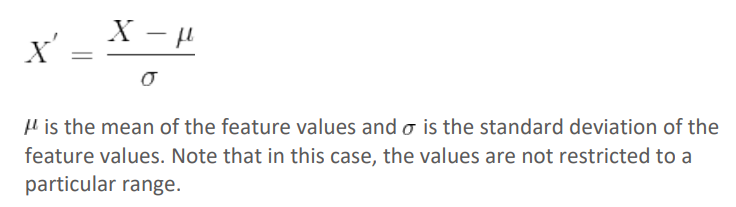

### Splitting the Dataset
* X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,random_state=0)
* Split arrays or matrices into random train and test subsets
* Quick utility that wraps input validation and next(ShuffleSplit().split(X, y)) and application to input data into a 
single call for splitting (and optionally subsampling) data in a oneliner.

* Imputer(missing_values='NaN', strategy='mean', axis=0)
* Imputation transformer for completing missing values.

### pandas.read_csv()
* Read a comma-separated values (csv) file into DataFrame.
* Also supports optionally iterating or breaking of the file into chunks.

### Dataset used and its attributes

<b>DataSet Link : </b> https://archive.ics.uci.edu/ml/datasets/breast+cancer+wisconsin+(diagnostic)<br>
<b>Dataset Information :</b>Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image.


<b>Features Explanations:</b>
* Number of Instances: 569
* Number of Attributes: 30 numeric, predictive attributes and the class
#### Attribute Information:
- radius (mean of distances from center to points on the perimeter)
- texture (standard deviation of gray-scale values)
- perimeter
- area
- smoothness (local variation in radius lengths)
- compactness (perimeter^2 / area - 1.0)
- concavity (severity of concave portions of the contour)
- concave points (number of concave portions of the contour)
- symmetry
- fractal dimension ("coastline approximation" - 1)

* The mean, standard error, and "worst" or largest (mean of the three largest values) of these features were computed for each data, resulting in 30 features. 
For instance, field 3 is Mean Radius, field 13 is Radius SE, field 23 is Worst Radius. 
* Missing Values: 569 
* Class Distribution: 
    * 212 - Malignant, 
    * 357 - Benign
Depending on the types of cells in a tumor, it can be:
* Benign - The tumor doesn’t contain cancerous cells.
* Malignant - The tumor contains cancerous cells.

<br>


### Import All Necessary Library

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")


In [2]:
from sklearn import preprocessing
from scipy.stats import norm
from sklearn.model_selection import train_test_split

### Load the DataSet

In [5]:
df = pd.read_csv("Breast Cancer Data.csv")

In [6]:
df.head()

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_worst  smoothness_worst  \
0  ...          17.33           184.60      2019.0            0.1622   
1  ...          23.41           158.80      1956.0            0.1238   
2  ...          25.53           152.50      1709.0            0.1444   
3  ...          26.50            98.87       567.7            0.2098   
4  ...          16.67           152.20      1575.0            0.1374   

   compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
0             0.6656           0.7119                0.2654          0.4601   
1             0.1866           0.2416                0.1860          0.2750   
2             0.4245           0.4504                0.2430          0.3613   
3             0.8663           0.6869                0.2575          0.6638   
4             0.2050           0.4000                0.1625          0.2364   

   fractal_dimension_worst  Unnamed: 32  
0                  0.11890          NaN  
1                  0.08902          NaN  
2                  0.08758          NaN  
3                  0.17300          NaN  
4                  0.07678          NaN  

[5 rows x 33 columns]

### View First 5 Rows

In [7]:
df.head()

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_worst  smoothness_worst  \
0  ...          17.33           184.60      2019.0            0.1622   
1  ...          23.41           158.80      1956.0            0.1238   
2  ...          25.53           152.50      1709.0            0.1444   
3  ...          26.50            98.87       567.7            0.2098   
4  ...          16.67           152.20      1575.0            0.1374   

   compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
0             0.6656           0.7119                0.2654          0.4601   
1             0.1866           0.2416                0.1860          0.2750   
2             0.4245           0.4504                0.2430          0.3613   
3             0.8663           0.6869                0.2575          0.6638   
4             0.2050           0.4000                0.1625          0.2364   

   fractal_dimension_worst  Unnamed: 32  
0                  0.11890          NaN  
1                  0.08902          NaN  
2                  0.08758          NaN  
3                  0.17300          NaN  
4                  0.07678          NaN  

[5 rows x 33 columns]

### Set Option to View all Rows and Columns

In [8]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

### Dimensions of the Dataset

In [9]:
df.shape

(569, 33)

### Concise Summary

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

### Check the Missing Data

In [11]:
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

From the above observation Unnamed: 32 column contains all the Null values<br>
So it would be better to drop the column

#### Drop the Column Containing Missing Value

In [12]:
df.drop('Unnamed: 32',axis = 1,inplace = True)

#### Recheck the Missing Value is present or not

In [13]:
df.isnull().sum().sum()

0

### Statistical Summary of data

In [14]:
df.describe()

id  radius_mean  texture_mean  perimeter_mean    area_mean  \
count  5.690000e+02   569.000000    569.000000      569.000000   569.000000   
mean   3.037183e+07    14.127292     19.289649       91.969033   654.889104   
std    1.250206e+08     3.524049      4.301036       24.298981   351.914129   
min    8.670000e+03     6.981000      9.710000       43.790000   143.500000   
25%    8.692180e+05    11.700000     16.170000       75.170000   420.300000   
50%    9.060240e+05    13.370000     18.840000       86.240000   551.100000   
75%    8.813129e+06    15.780000     21.800000      104.100000   782.700000   
max    9.113205e+08    28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000000   
25%           0.086370          0.064920        0.029560             0.020310   
50%           0.095870          0.092630        0.061540             0.033500   
75%           0.105300          0.130400        0.130700             0.074000   
max           0.163400          0.345400        0.426800             0.201200   

       symmetry_mean  fractal_dimension_mean   radius_se  texture_se  \
count     569.000000              569.000000  569.000000  569.000000   
mean        0.181162                0.062798    0.405172    1.216853   
std         0.027414                0.007060    0.277313    0.551648   
min         0.106000                0.049960    0.111500    0.360200   
25%         0.161900                0.057700    0.232400    0.833900   
50%         0.179200                0.061540    0.324200    1.108000   
75%         0.195700                0.066120    0.478900    1.474000   
max         0.304000                0.097440    2.873000    4.885000   

       perimeter_se     area_se  smoothness_se  compactness_se  concavity_se  \
count    569.000000  569.000000     569.000000      569.000000    569.000000   
mean       2.866059   40.337079       0.007041        0.025478      0.031894   
std        2.021855   45.491006       0.003003        0.017908      0.030186   
min        0.757000    6.802000       0.001713        0.002252      0.000000   
25%        1.606000   17.850000       0.005169        0.013080      0.015090   
50%        2.287000   24.530000       0.006380        0.020450      0.025890   
75%        3.357000   45.190000       0.008146        0.032450      0.042050   
max       21.980000  542.200000       0.031130        0.135400      0.396000   

       concave points_se  symmetry_se  fractal_dimension_se  radius_worst  \
count         569.000000   569.000000            569.000000    569.000000   
mean            0.011796     0.020542              0.003795     16.269190   
std             0.006170     0.008266              0.002646      4.833242   
min             0.000000     0.007882              0.000895      7.930000   
25%             0.007638     0.015160              0.002248     13.010000   
50%             0.010930     0.018730              0.003187     14.970000   
75%             0.014710     0.023480              0.004558     18.790000   
max             0.052790     0.078950              0.029840     36.040000   

       texture_worst  perimeter_worst   area_worst  smoothness_worst  \
count     569.000000       569.000000   569.000000        569.000000   
mean       25.677223       107.261213   880.583128          0.132369   
std         6.146258        33.602542   569.356993          0.022832   
min        12.020000        50.410000   185.200000          0.071170   
25%        21.080000        84.110000   515.300000          0.116600   
50%        25.410000        97.660000   686.500000          0.131300   
75%    

### Columns of the dataset

In [15]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

### Check The types of values of Diagnosis Present In dataset

In [16]:
df.diagnosis.unique()

array(['M', 'B'], dtype=object)

### Count number of Malignant (M) or Benign (B) Cells

In [17]:
df['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

<AxesSubplot:xlabel='diagnosis', ylabel='count'>

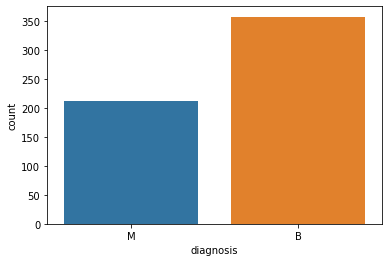

In [18]:
sns.countplot('diagnosis',data=df,label ="Diagnosis")


### Univatiate Analysis

#### Check the outlier in the dataset

In [19]:
data = ['radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst']

In [20]:
def box_plot_wiskers(feature):
    sns.set_style('whitegrid')
    out_marker = dict(markerfacecolor='yellow',markeredgecolor = 'black', marker='o', markersize = 12)
    plt.figure(figsize=(15,5))
    plt.title(feature ,fontsize = 20) 
    plt.xlabel(feature , fontsize = 15)  
    

    
    boxplot = sns.boxplot(df[feature],color='orange',
                          showmeans=True,  
                          notch = True,
                          flierprops=out_marker,
                          meanprops={ "marker":"o",
                                    "markerfacecolor":"red", 
                                    "markeredgecolor":"black",
                                    "markersize":"8"})
    

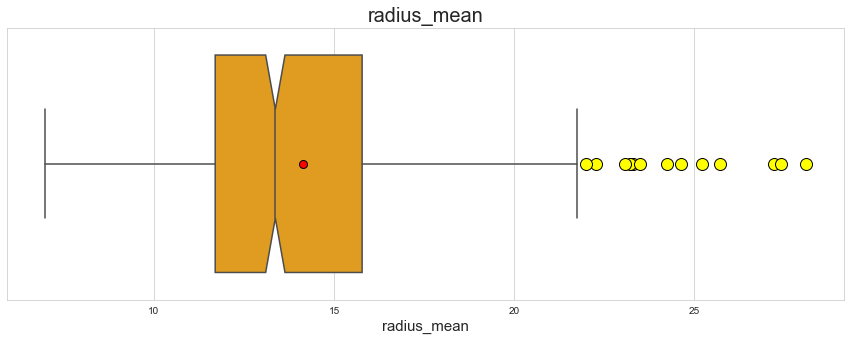

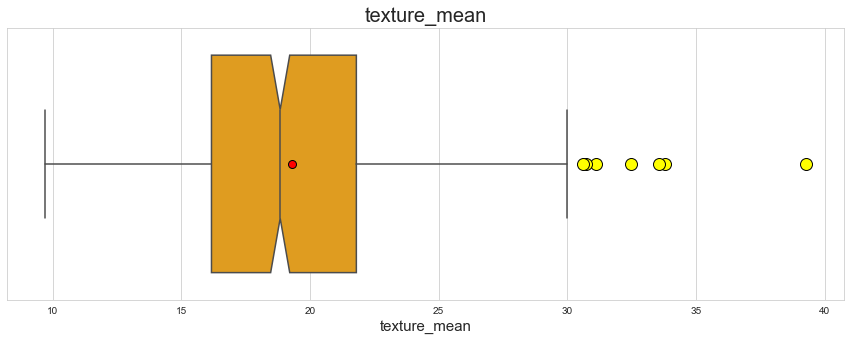

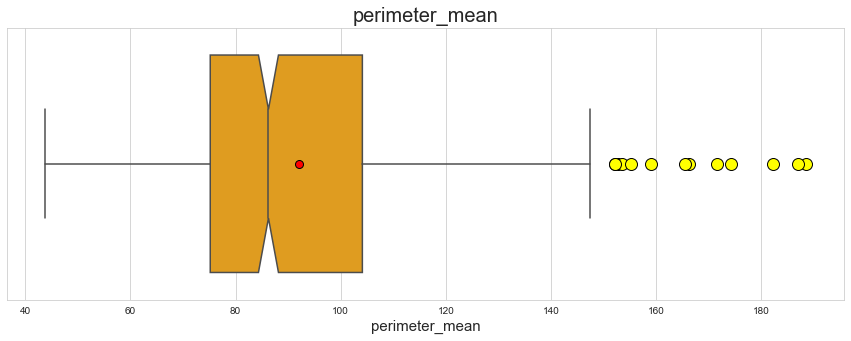

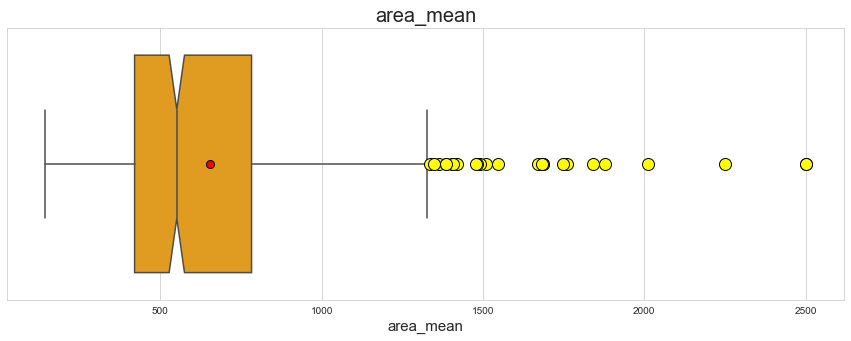

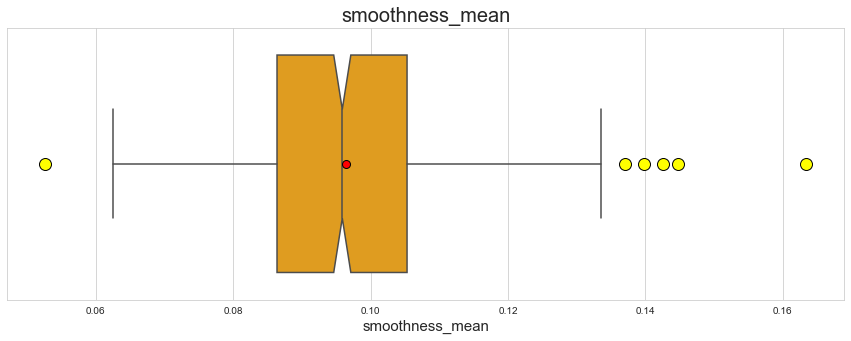

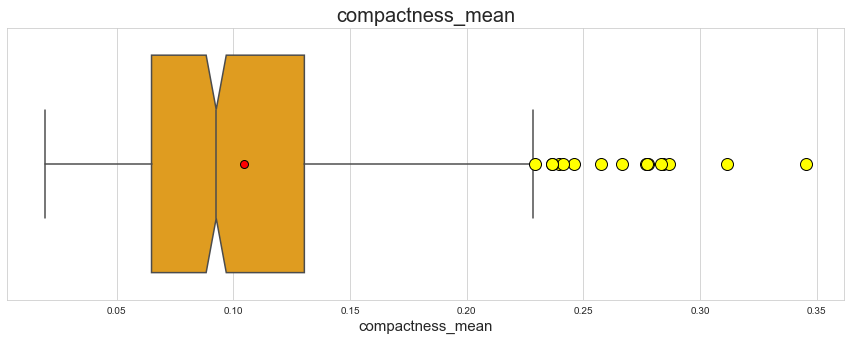

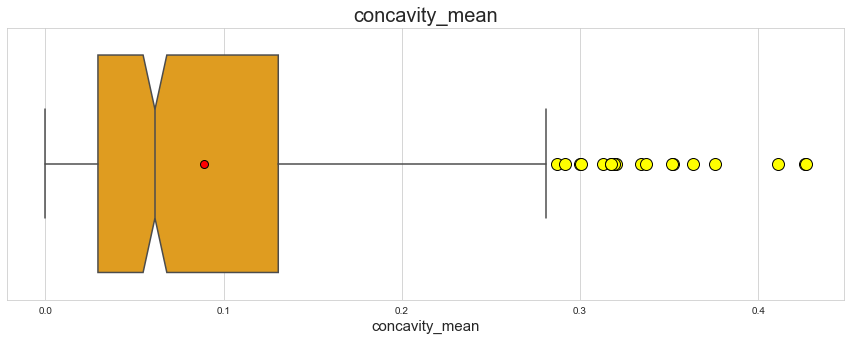

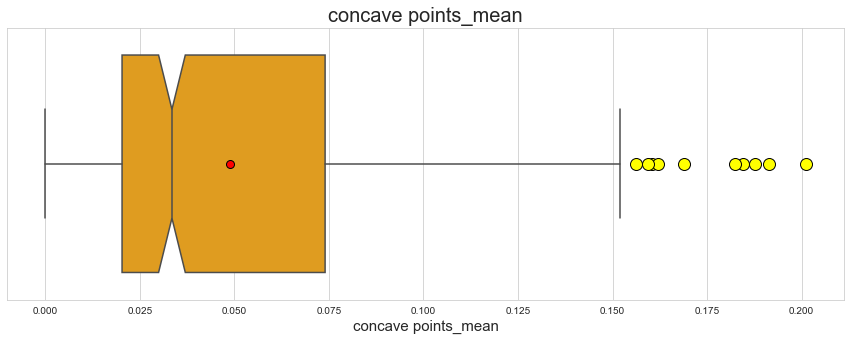

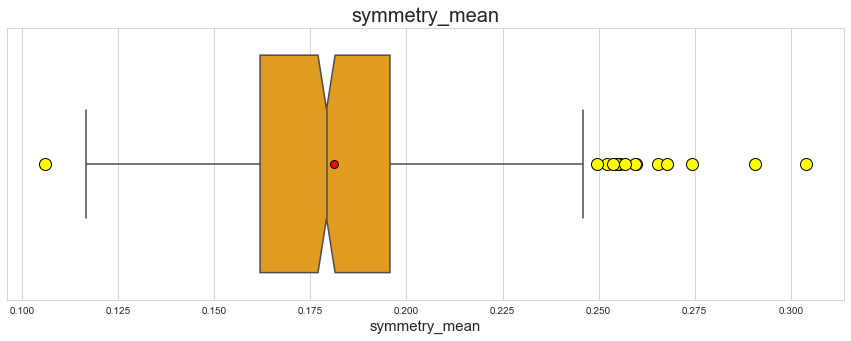

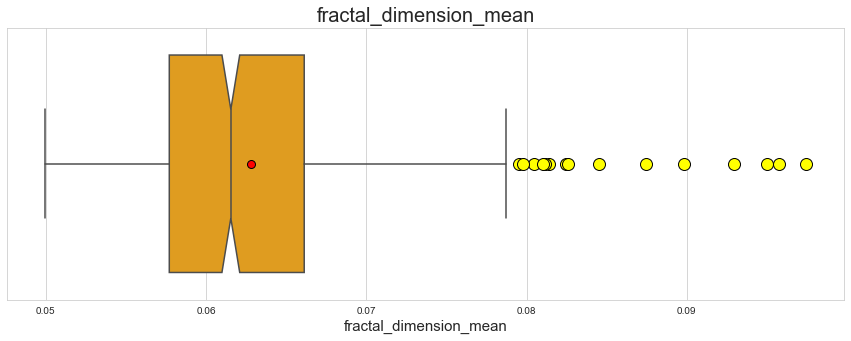

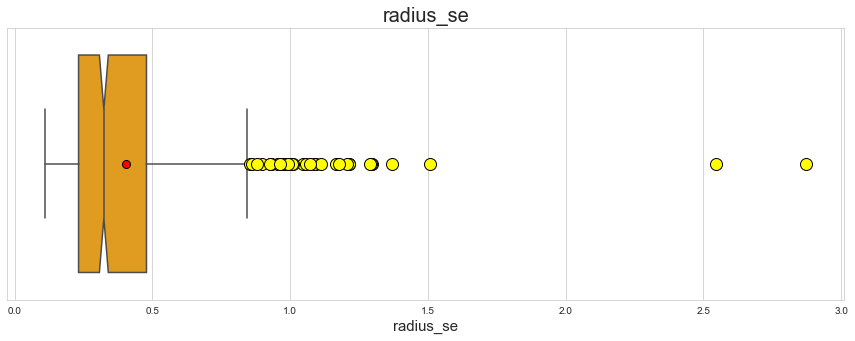

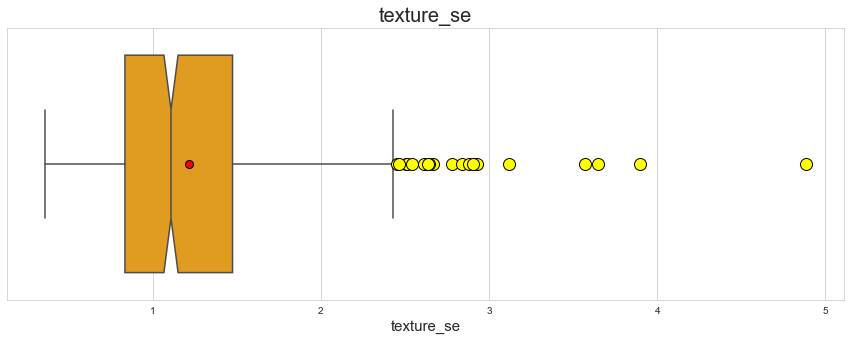

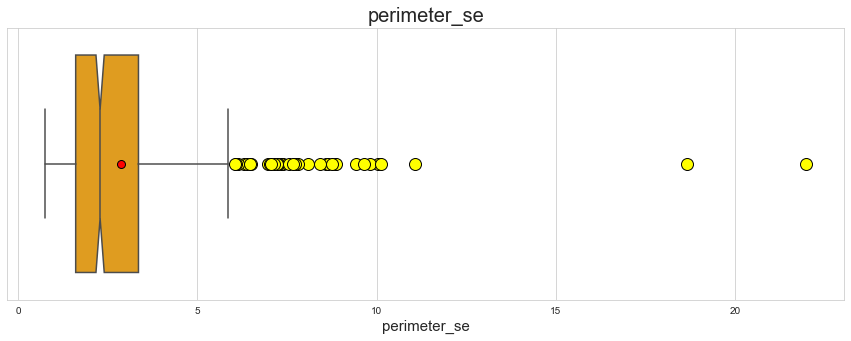

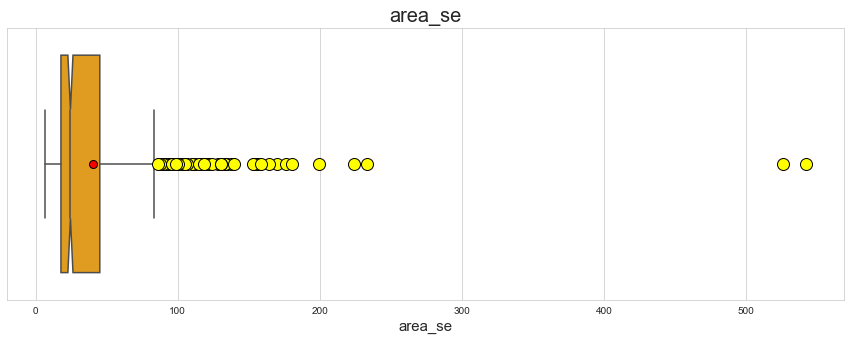

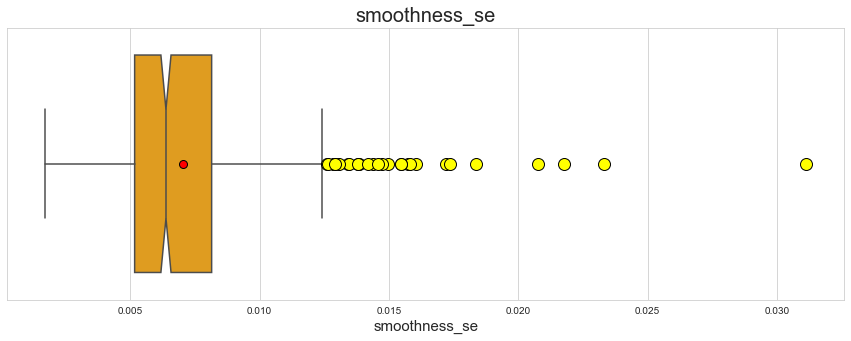

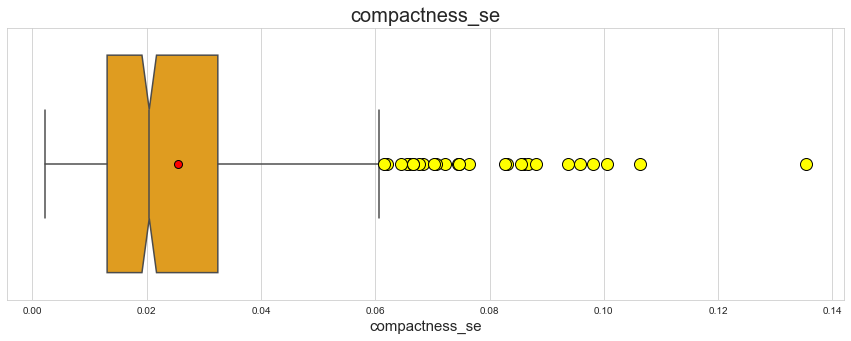

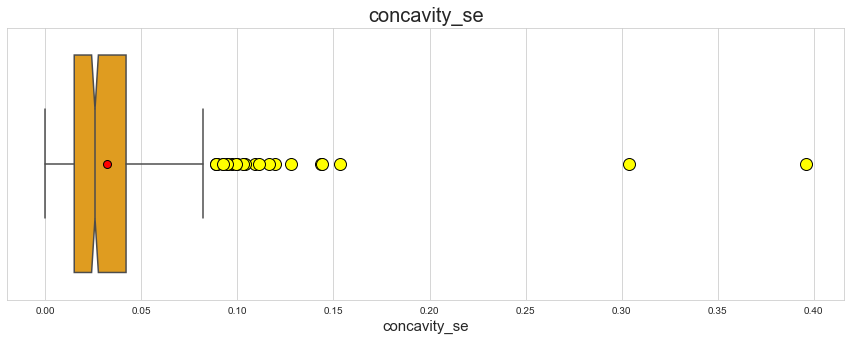

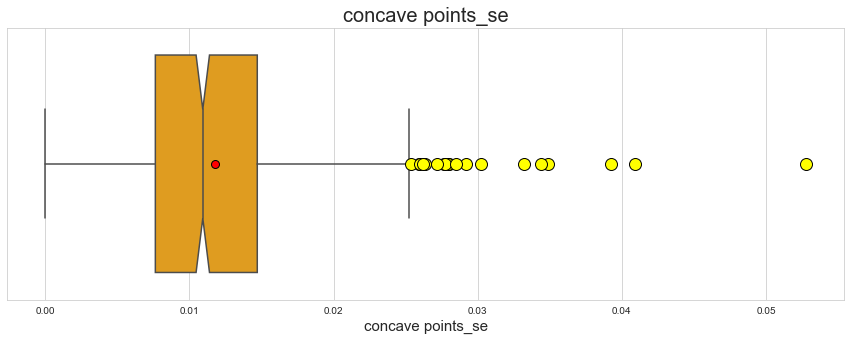

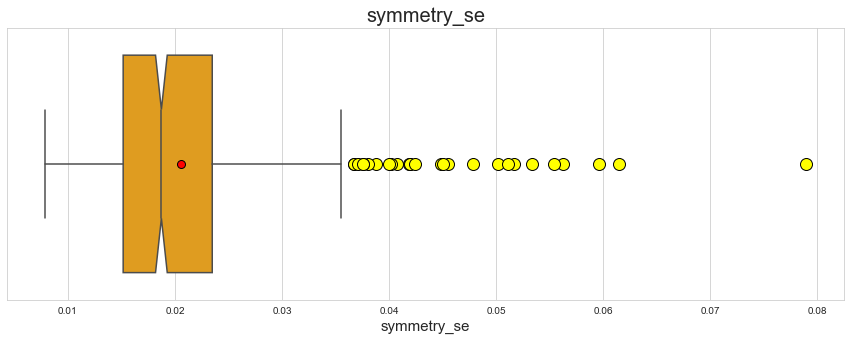

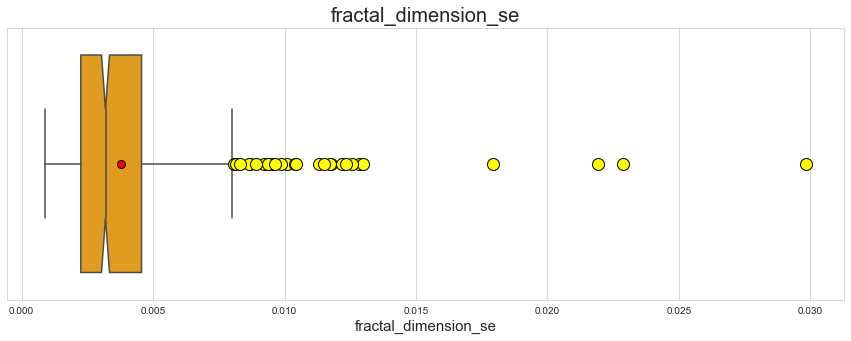

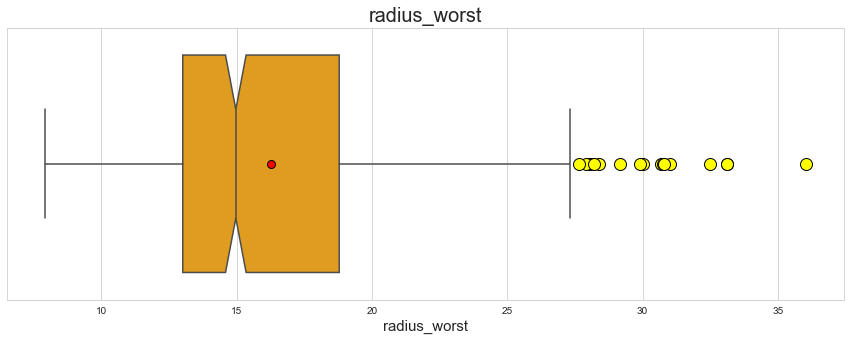

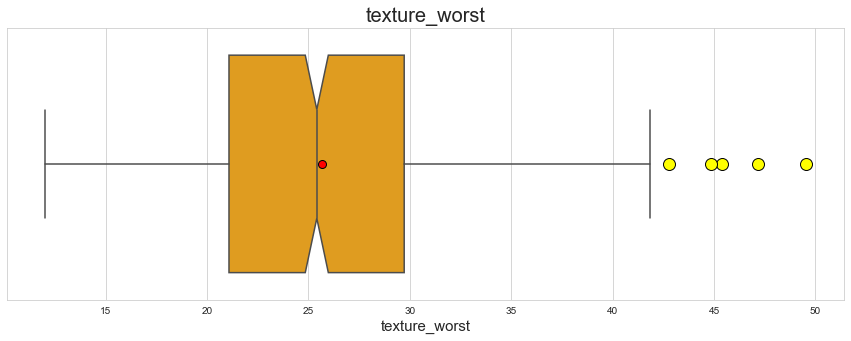

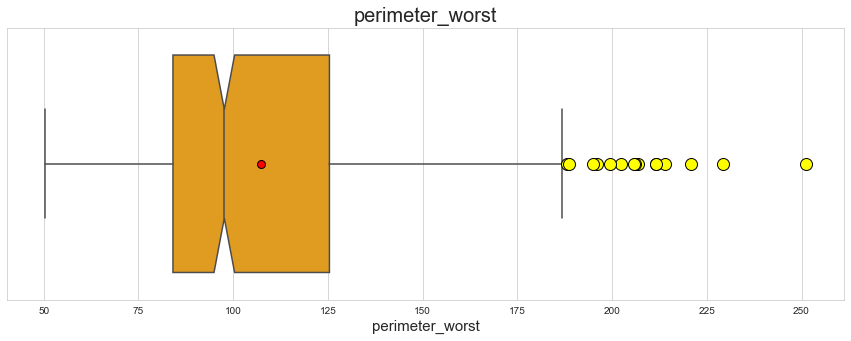

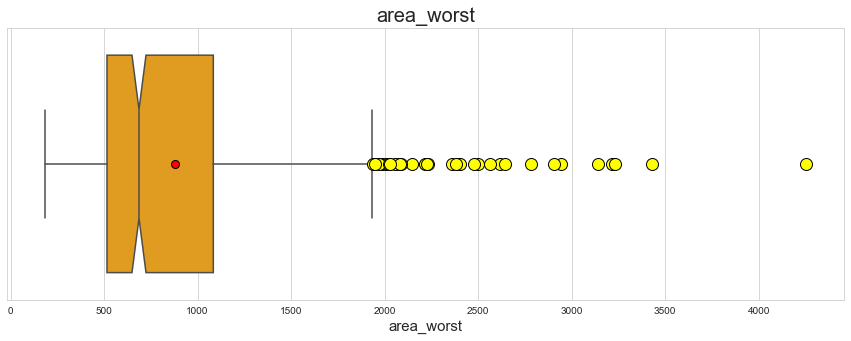

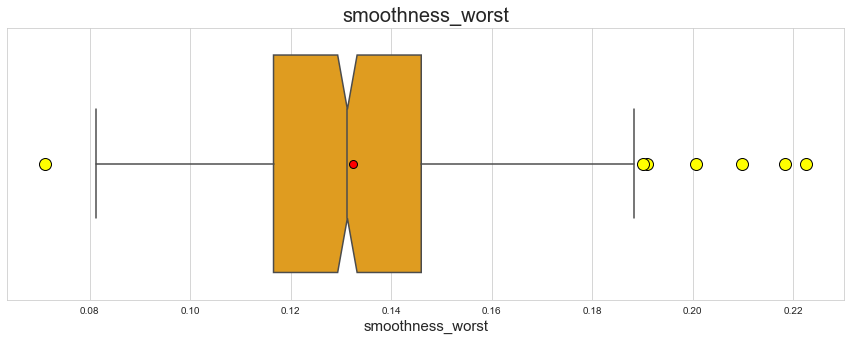

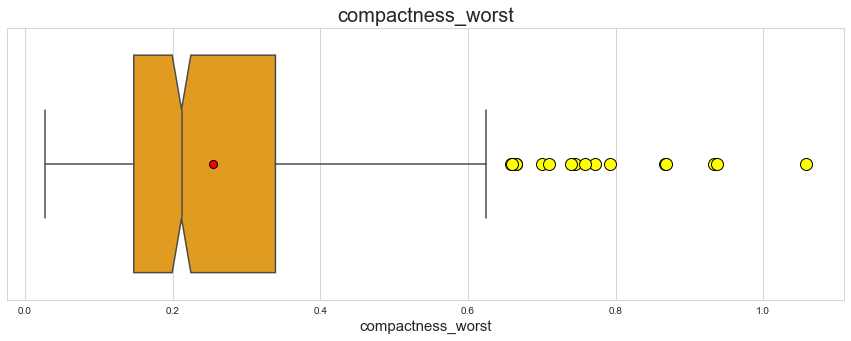

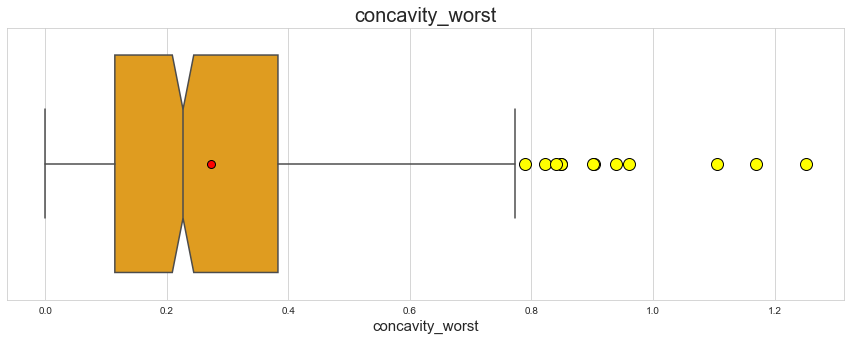

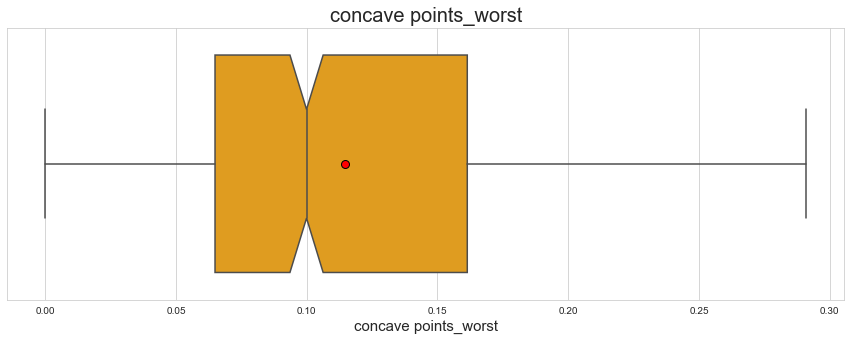

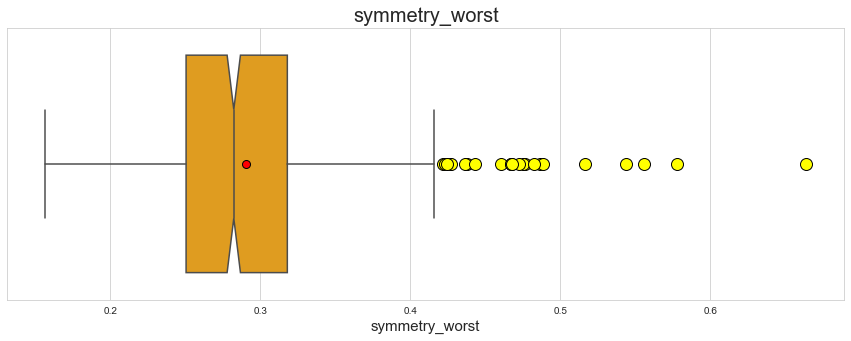

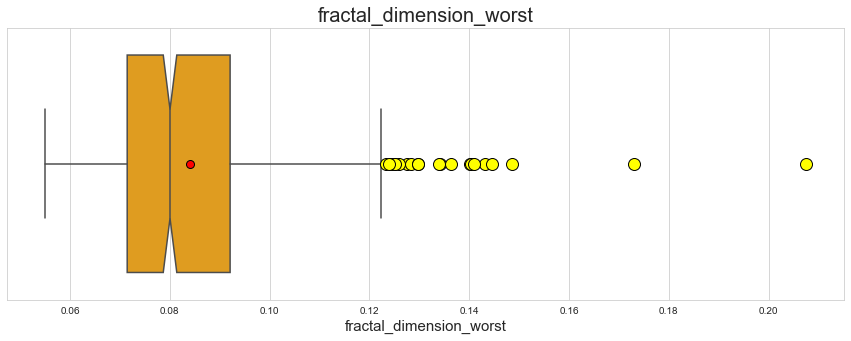

In [21]:
for clm in data:
    box_plot_wiskers(clm)

In [22]:
for i in df.columns[3:]:
    Q1,Q3 = np.quantile(df[i],[0.25,0.75])
    IQR = Q3-Q1
    lower_bound = Q1 - (1.5*IQR)
    if lower_bound < 0:  # as in whole dataset there is no -ve value hence we set lowerbound to 0
        lower_bound=0
    upper_bound = Q3 + (1.5*IQR)
    print(i)
    print('Lower Bound =',np.round(lower_bound,2),' Upper Bound =',np.round(upper_bound,2))
    print('min value =',df[i].min(), ' max value =', df[i].max())

    if df[i].min() < lower_bound:
        print('negative Outliers',len(df[(df[i]<lower_bound)]))
    
    if df[i].max() > upper_bound:
        print('positive Outliers', len(df[(df[i]>upper_bound)]))  
        
   
        
       
    
    print('='*50)

texture_mean
Lower Bound = 7.73  Upper Bound = 30.24
min value = 9.71  max value = 39.28
positive Outliers 7
perimeter_mean
Lower Bound = 31.78  Upper Bound = 147.49
min value = 43.79  max value = 188.5
positive Outliers 13
area_mean
Lower Bound = 0  Upper Bound = 1326.3
min value = 143.5  max value = 2501.0
positive Outliers 25
smoothness_mean
Lower Bound = 0.06  Upper Bound = 0.13
min value = 0.05263  max value = 0.1634
negative Outliers 1
positive Outliers 5
compactness_mean
Lower Bound = 0  Upper Bound = 0.23
min value = 0.01938  max value = 0.3454
positive Outliers 16
concavity_mean
Lower Bound = 0  Upper Bound = 0.28
min value = 0.0  max value = 0.4268
positive Outliers 18
concave points_mean
Lower Bound = 0  Upper Bound = 0.15
min value = 0.0  max value = 0.2012
positive Outliers 10
symmetry_mean
Lower Bound = 0.11  Upper Bound = 0.25
min value = 0.106  max value = 0.304
negative Outliers 1
positive Outliers 14
fractal_dimension_mean
Lower Bound = 0.05  Upper Bound = 0.08
min va

### Data Distribution of Each feature

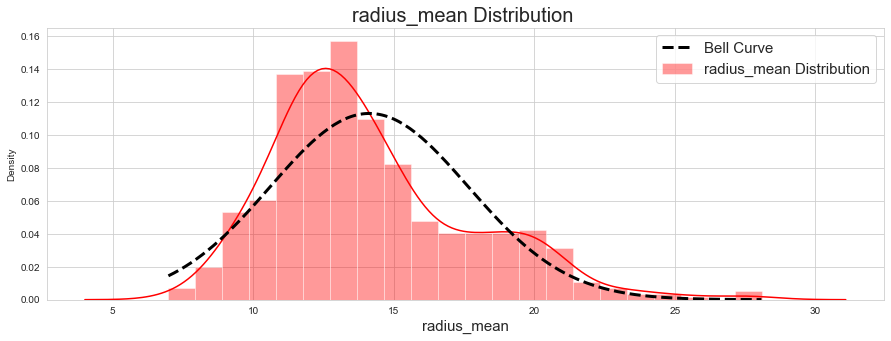

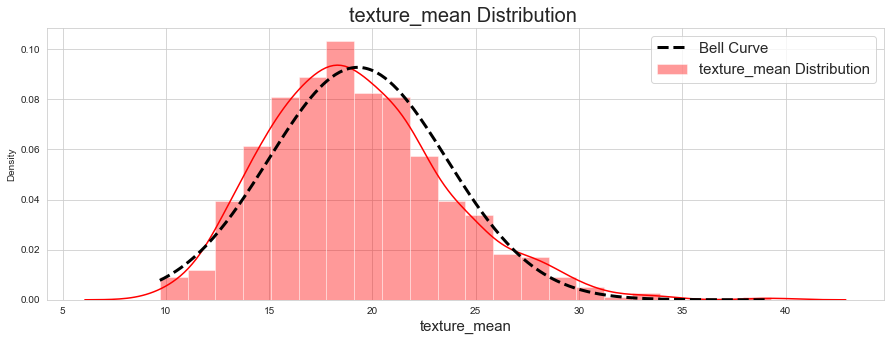

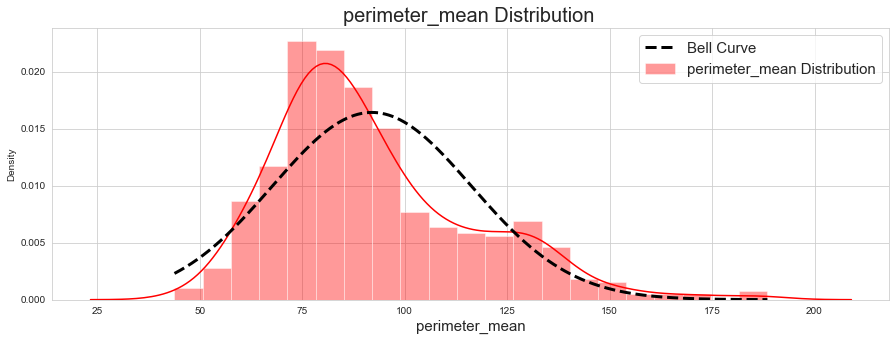

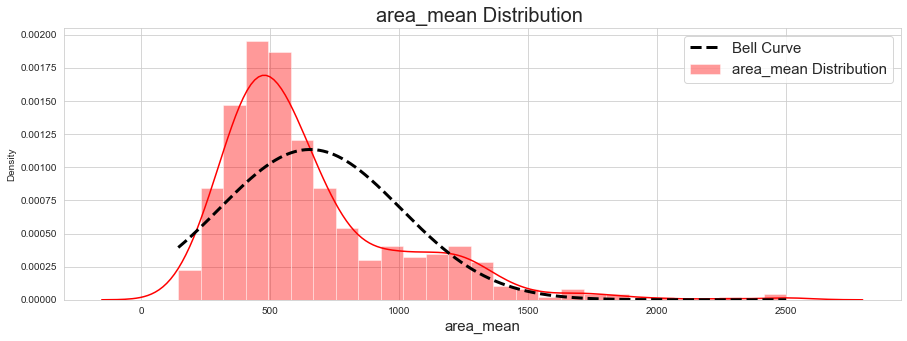

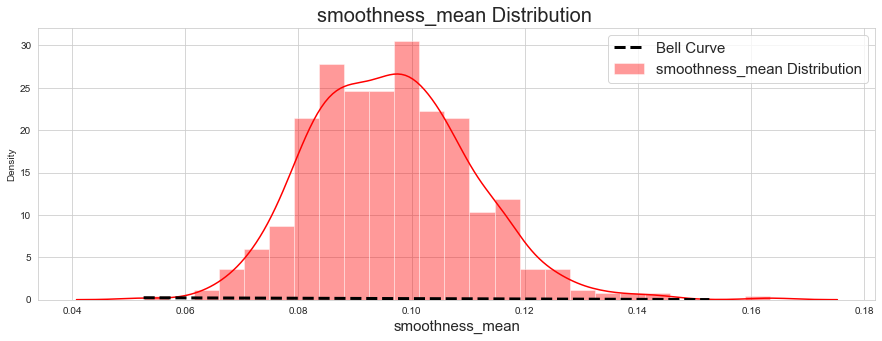

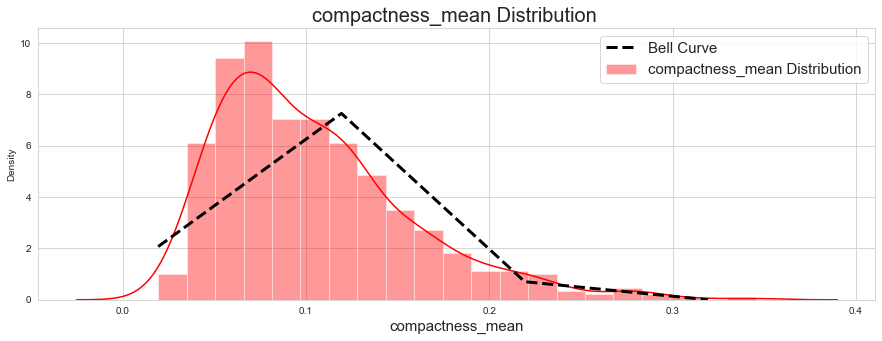

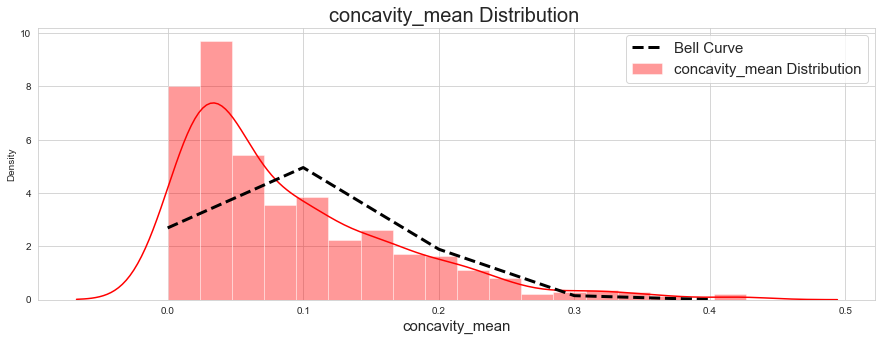

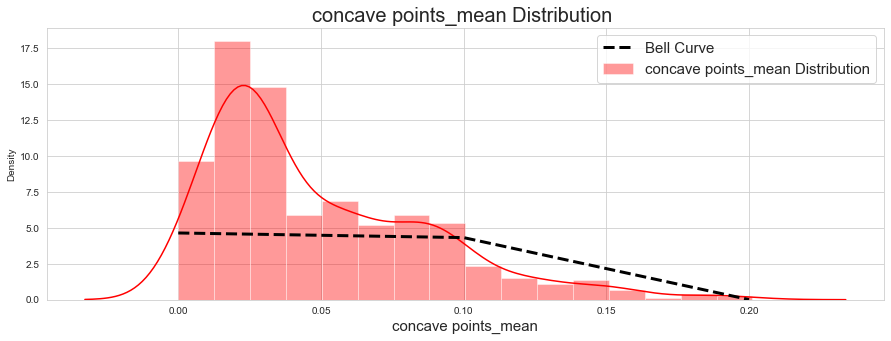

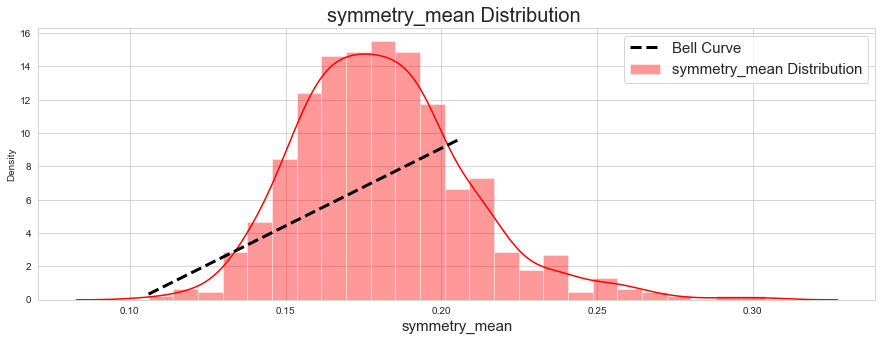

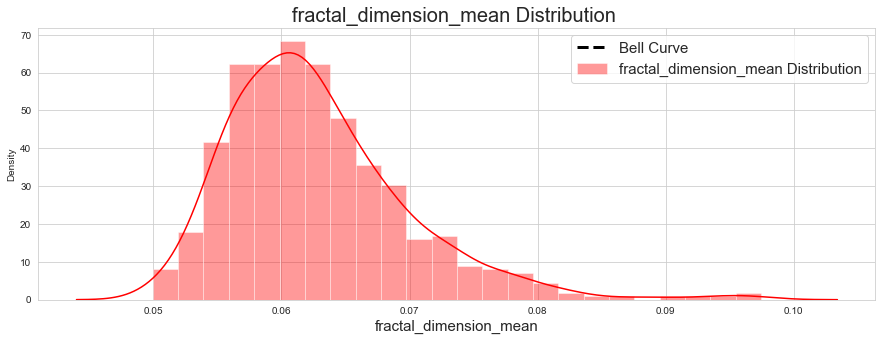

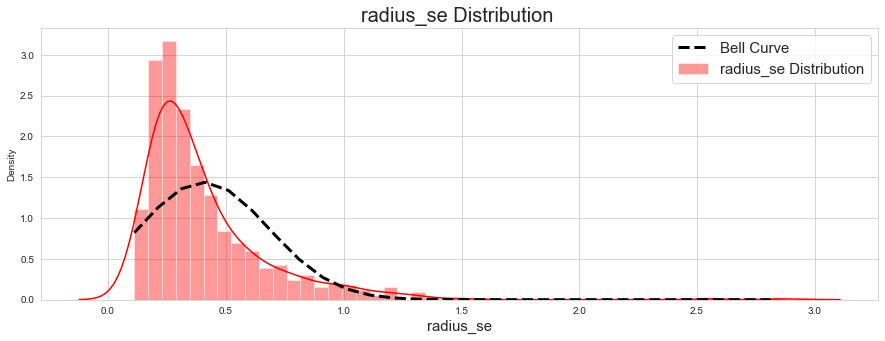

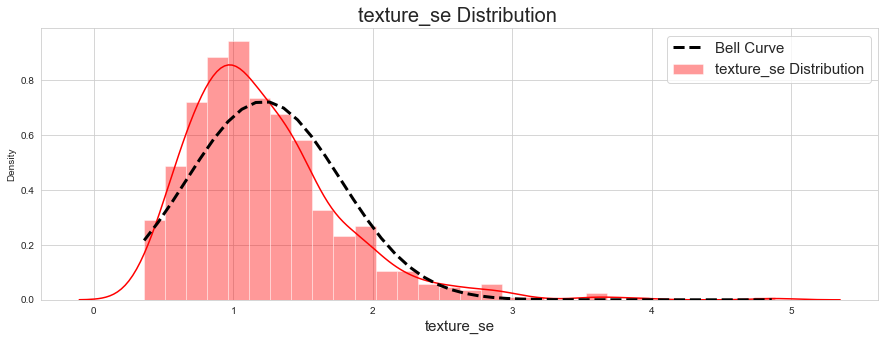

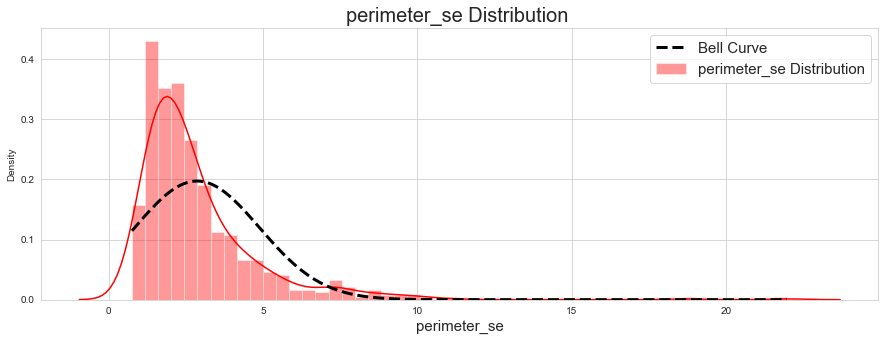

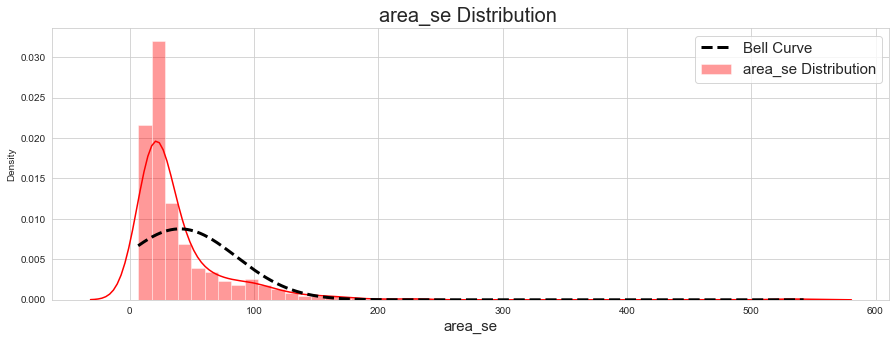

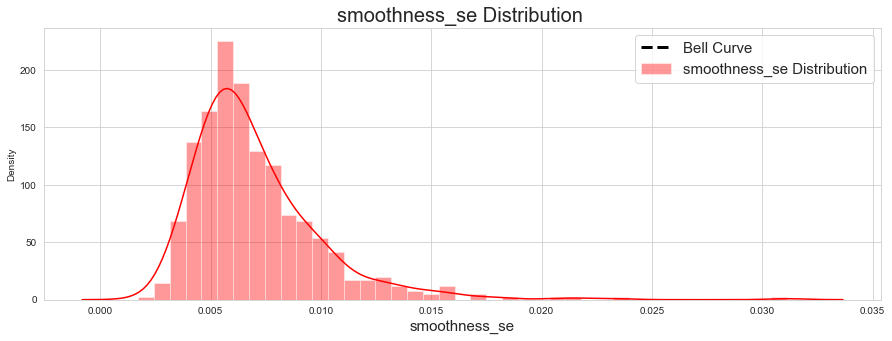

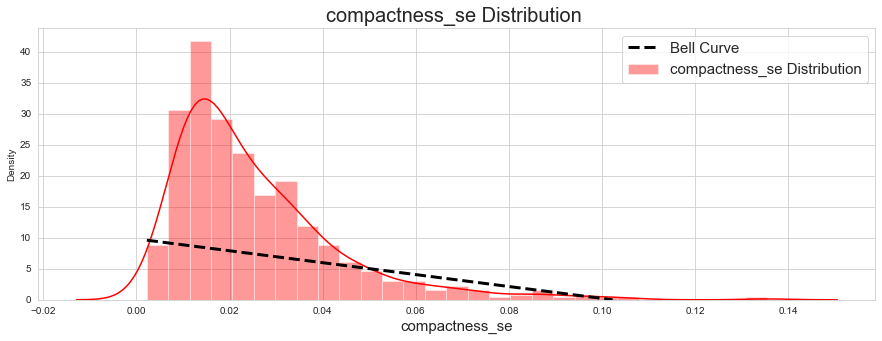

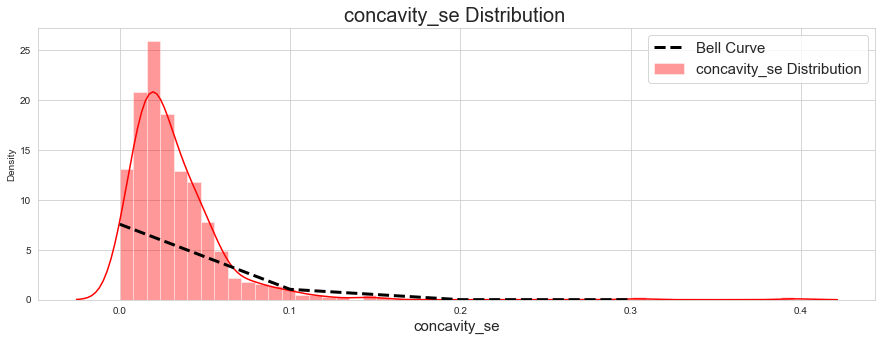

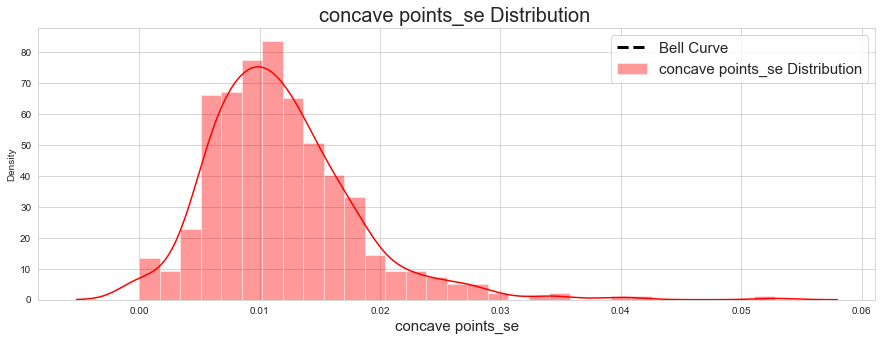

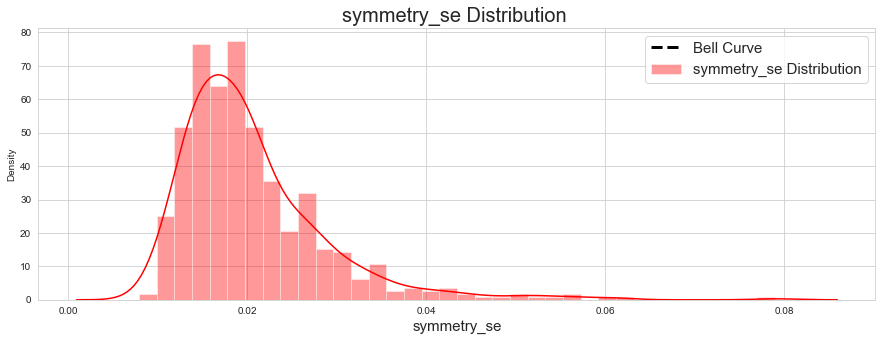

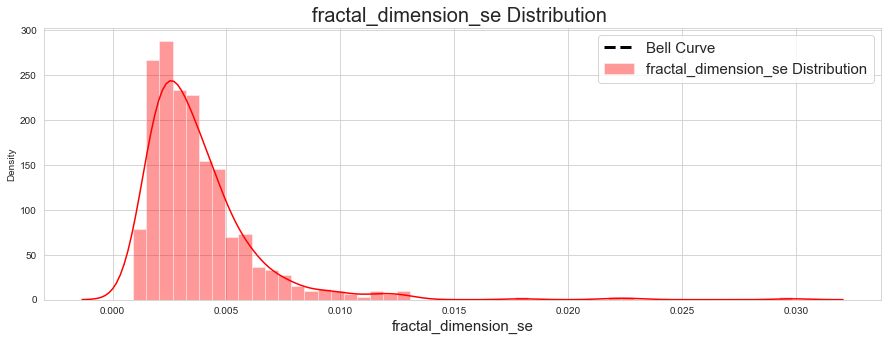

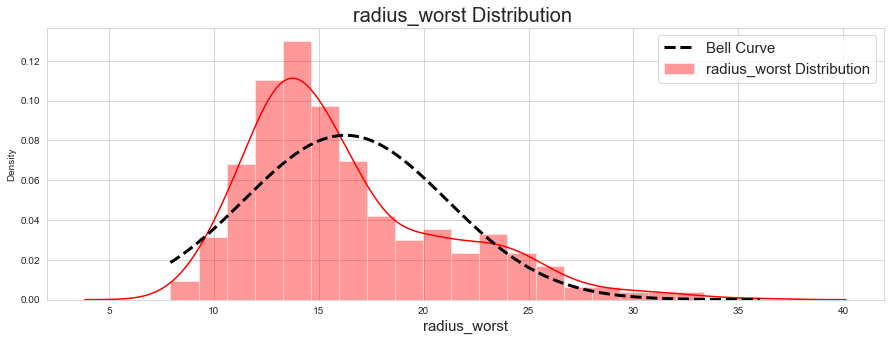

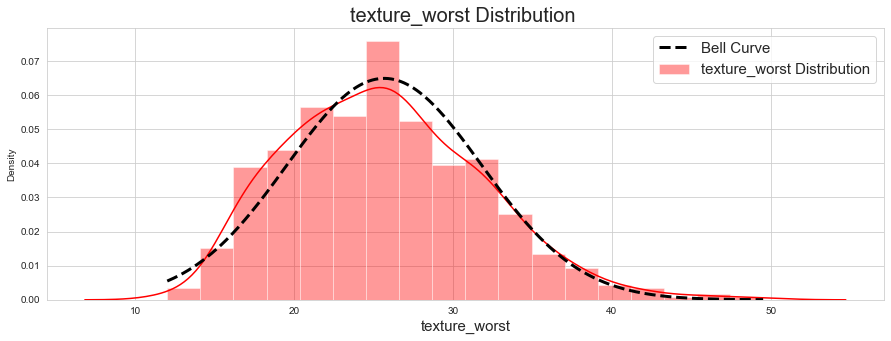

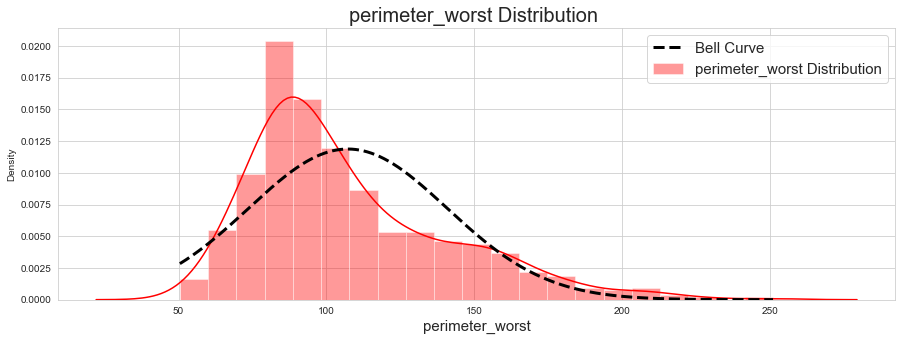

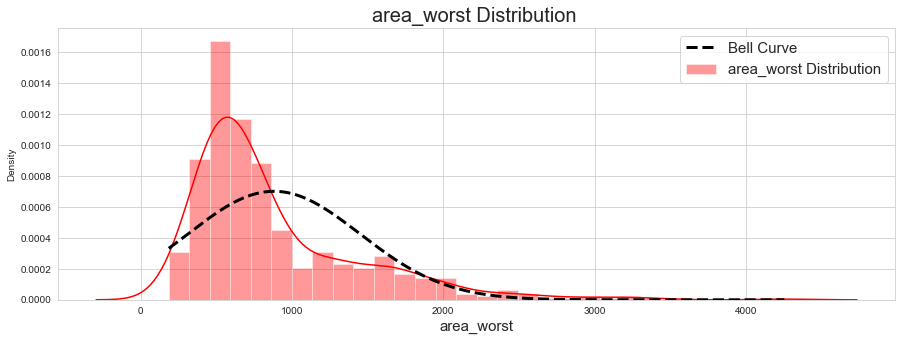

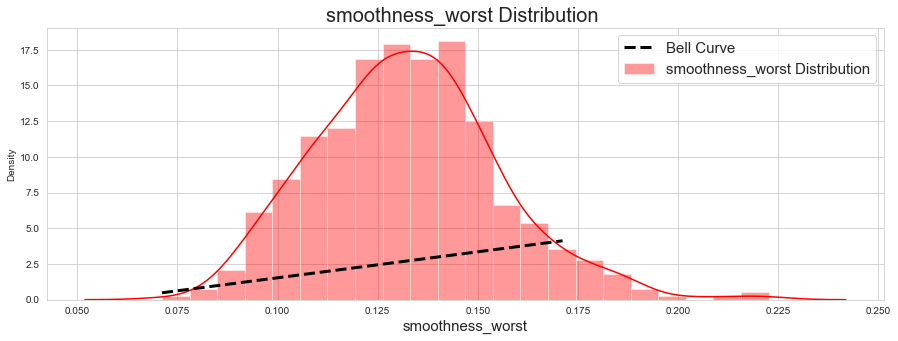

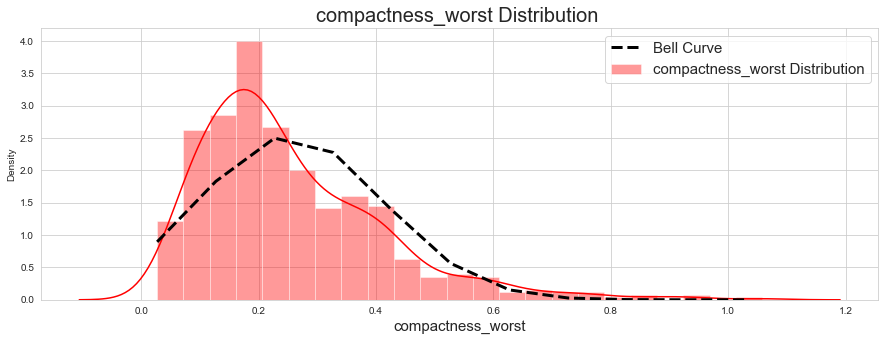

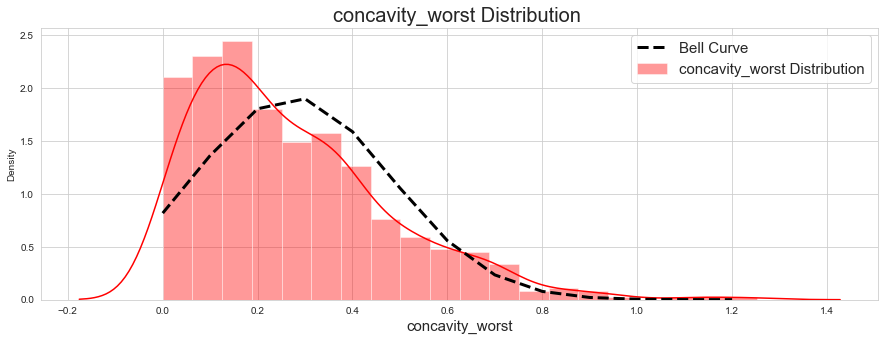

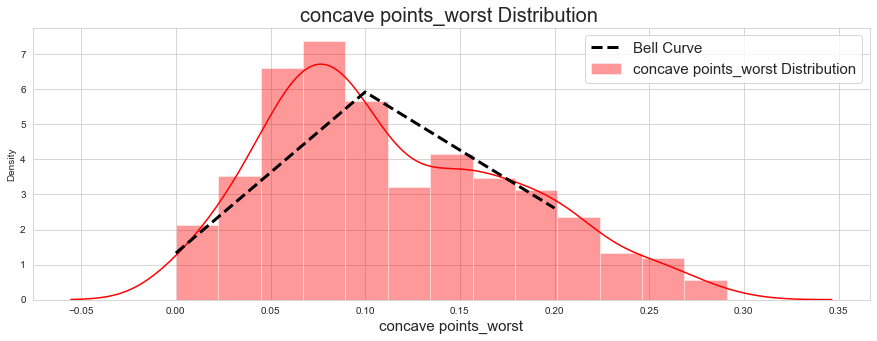

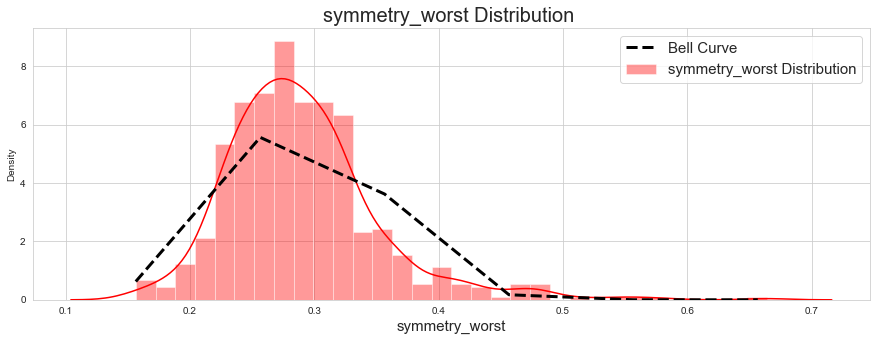

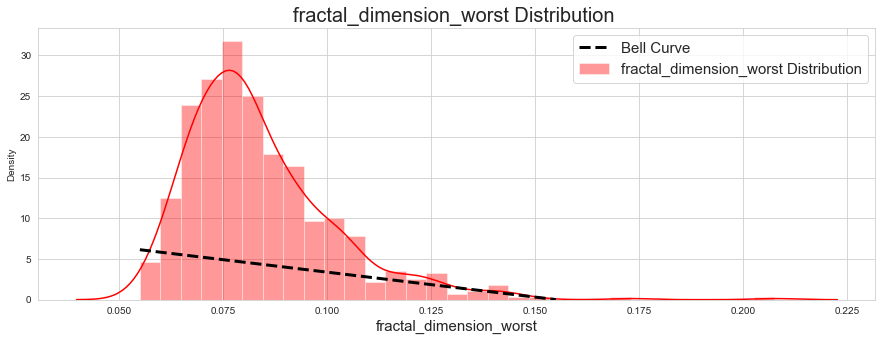

In [23]:
for clm in df.columns[2:]:    
    sns.set_style('whitegrid')    
    plt.figure(figsize=(15,5))
    plt.title(clm+' Distribution ',fontsize = 20) 
    plt.xlabel(clm , fontsize = 15) 
    sns.distplot(df[clm],color='r' , label=clm+' Distribution')

    rang = np.arange(df[clm].min(),df[clm].max(),0.1)
    plt.plot(rang, norm.pdf(rang,df[clm].mean(),df[clm].std()),color='black', ls='--',lw =3,label = 'Bell Curve')
    plt.legend(fontsize= 15)

### Distribution density plot KDE (kernel density estimate)

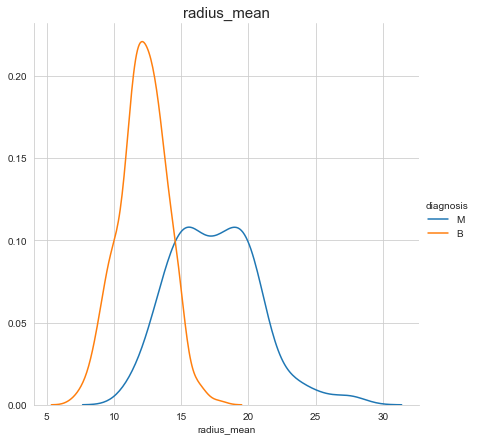

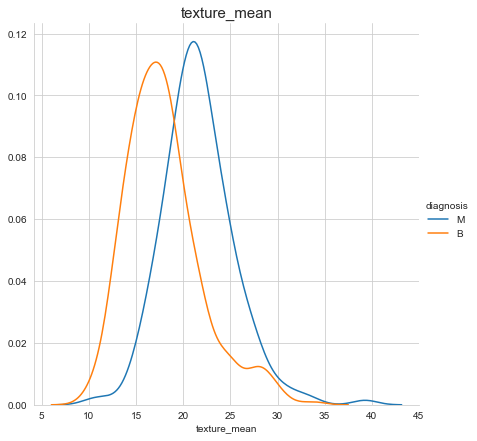

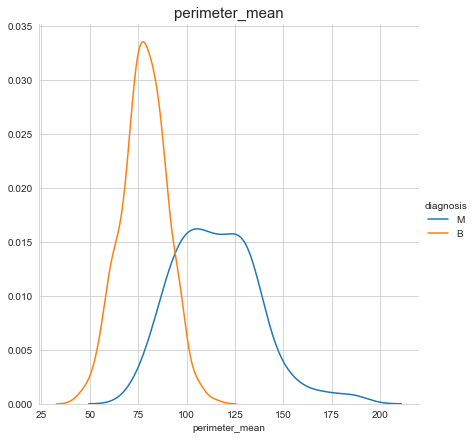

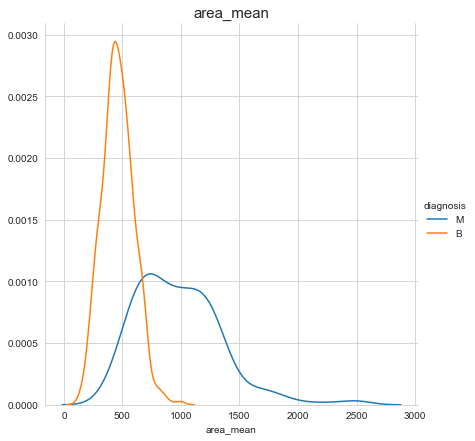

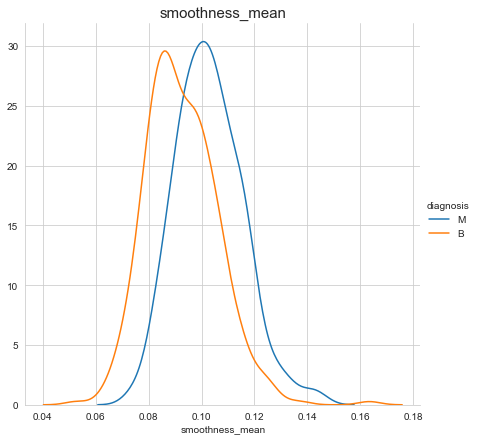

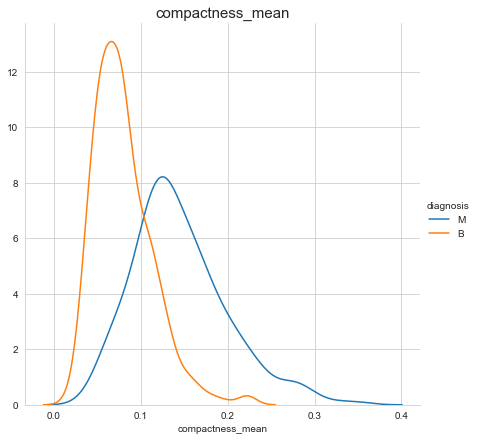

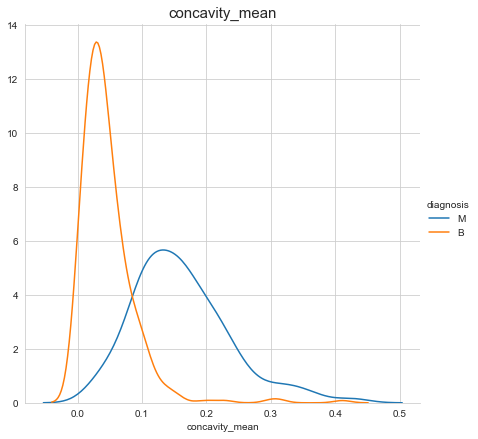

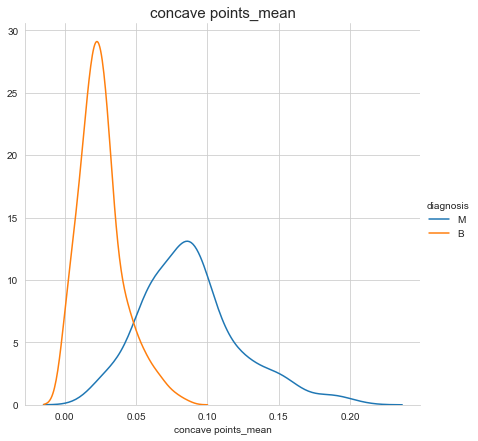

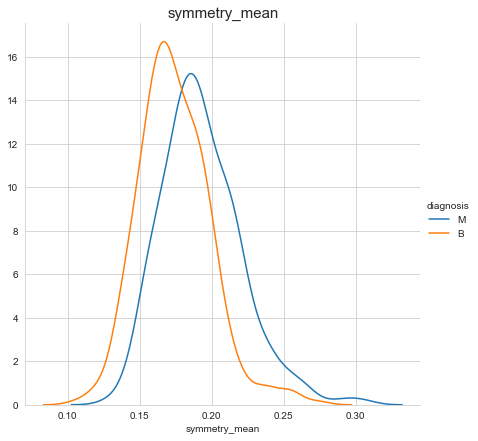

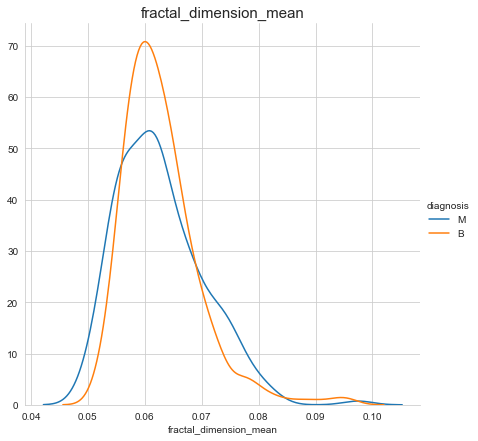

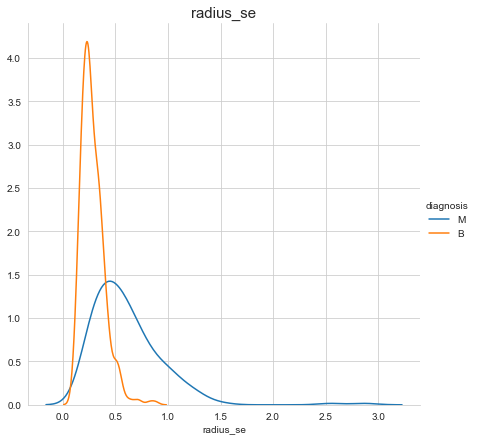

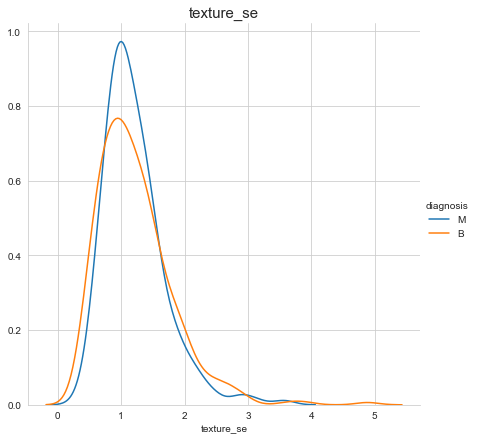

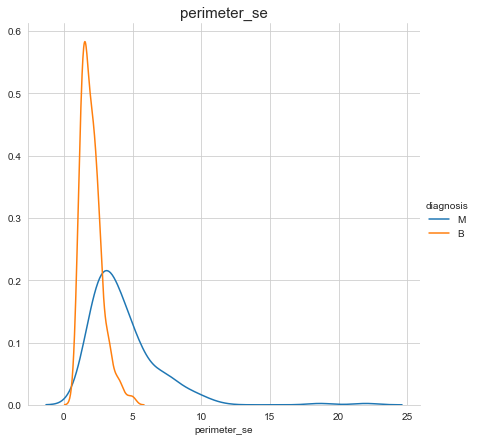

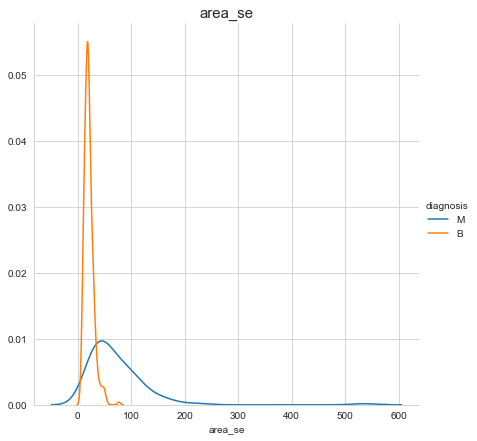

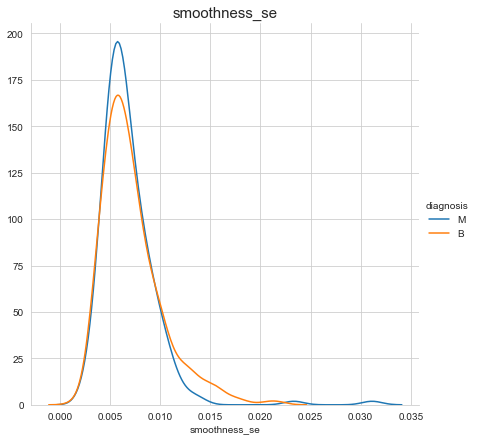

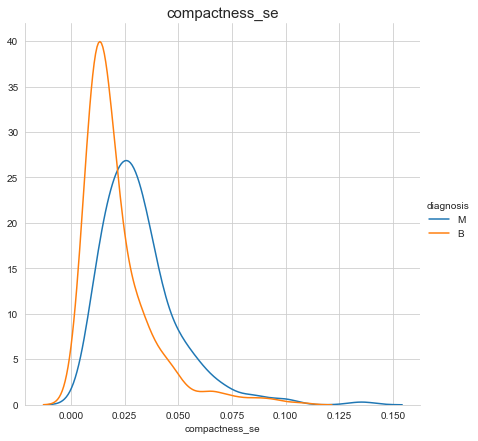

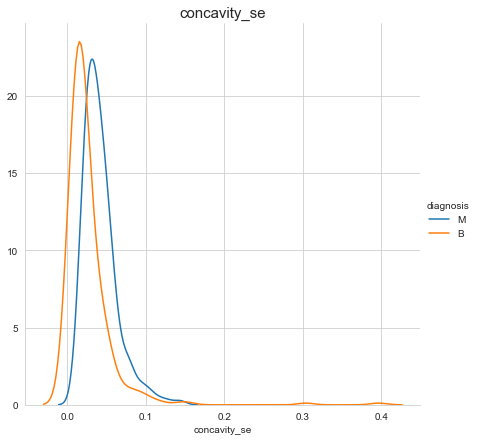

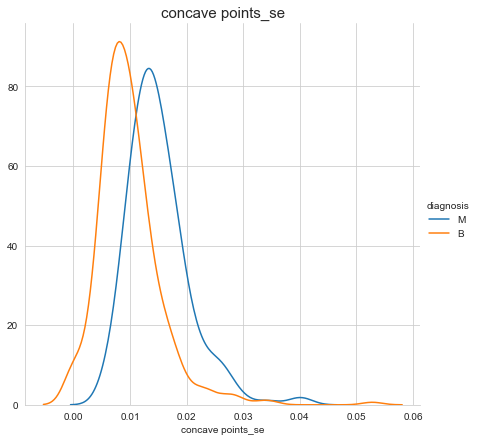

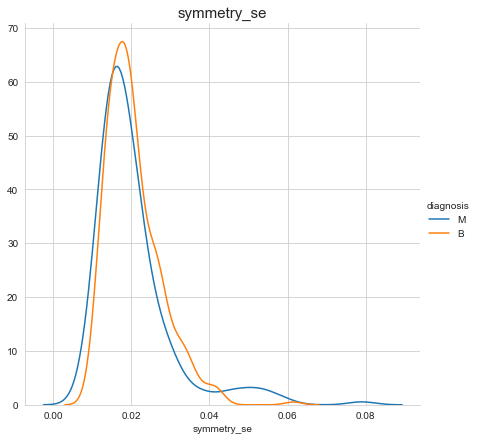

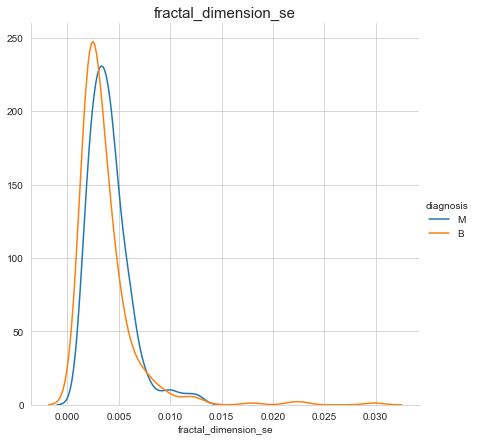

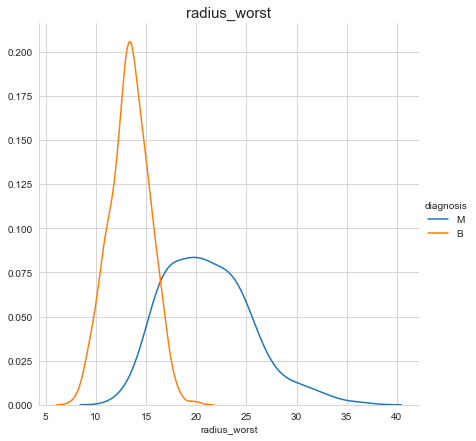

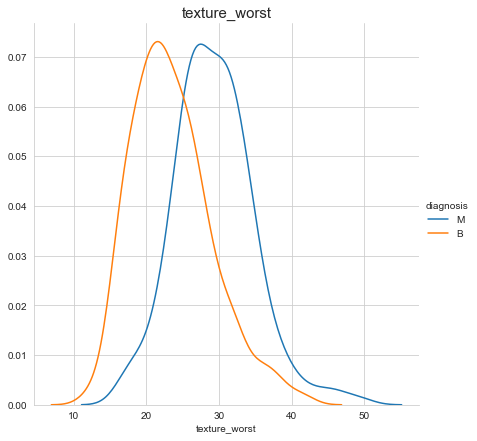

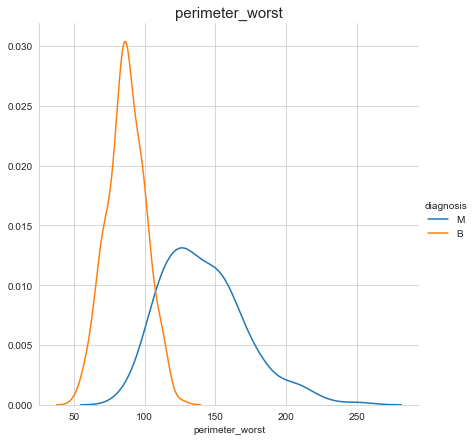

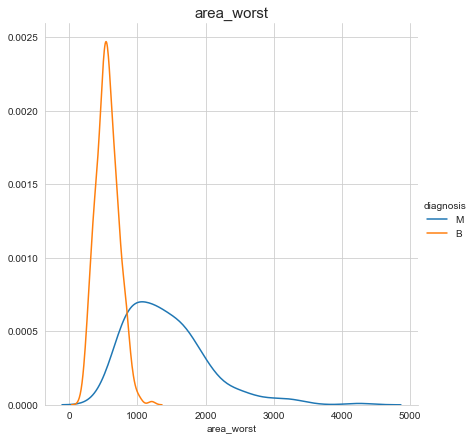

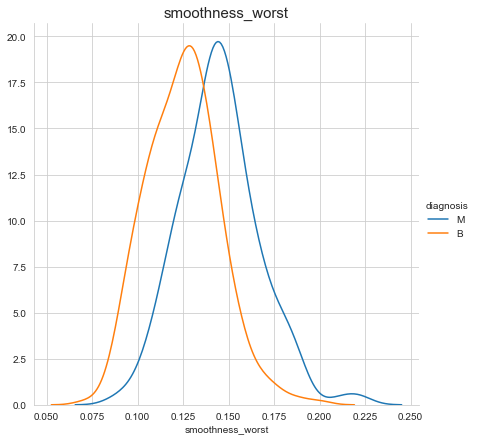

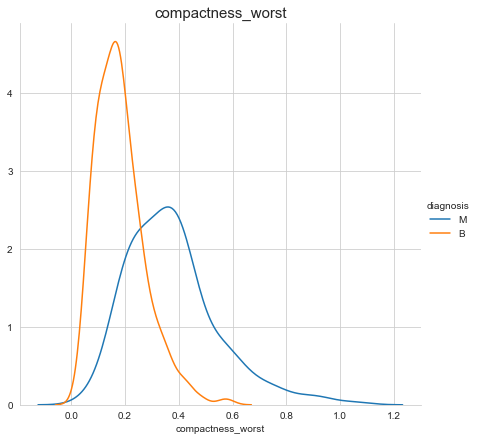

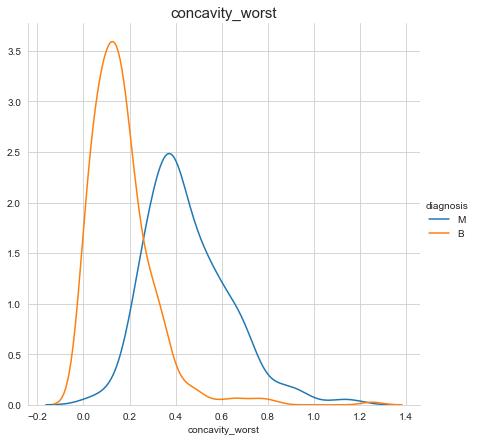

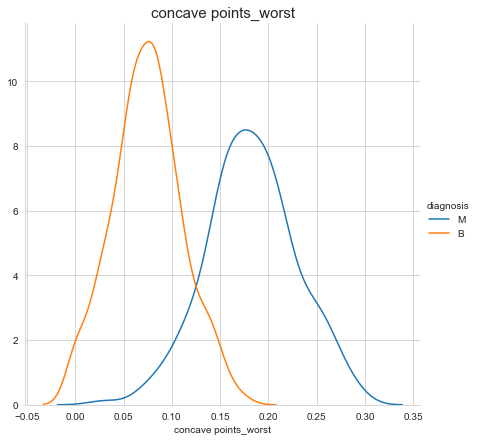

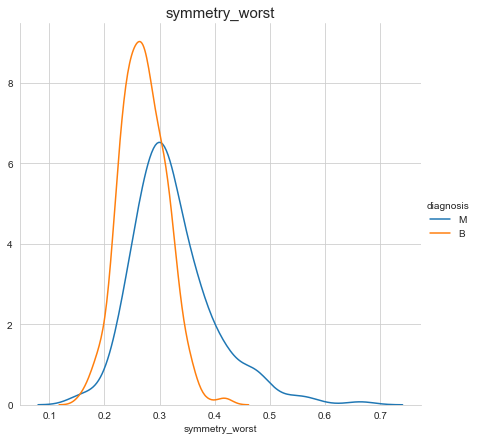

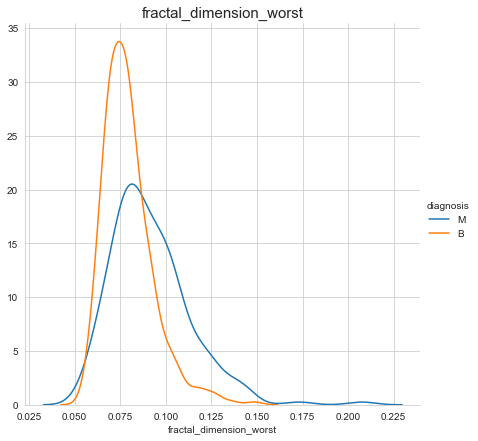

In [24]:
for clm in data:
    sns.FacetGrid(df, hue="diagnosis", height=6).map(sns.kdeplot, clm).add_legend()
    plt.title(clm,fontsize=15)
    plt.show()

###  Plotting Bivariate  relations between  features and diagnosis

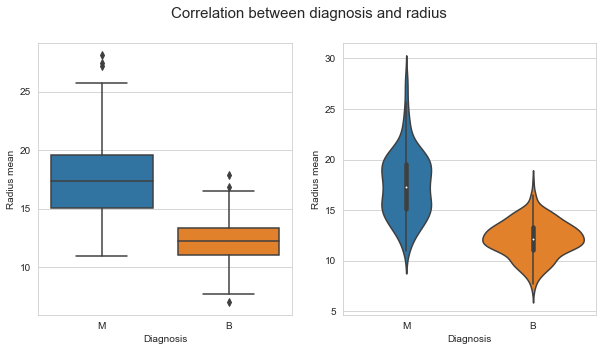

In [25]:
 

plt.figure(figsize=(10,5))
plt.suptitle("Correlation between diagnosis and radius",fontsize=15)
plt.subplot(1,2,1)
sns.boxplot(x="diagnosis", y="radius_mean", data=df)
plt.xlabel('Diagnosis',fontsize=10)
plt.ylabel("Radius mean",fontsize=10)
plt.subplot(1,2,2)
sns.violinplot(x="diagnosis", y="radius_mean", data=df)
plt.xlabel('Diagnosis',fontsize=10)
plt.ylabel("Radius mean",fontsize=10)
plt.show()

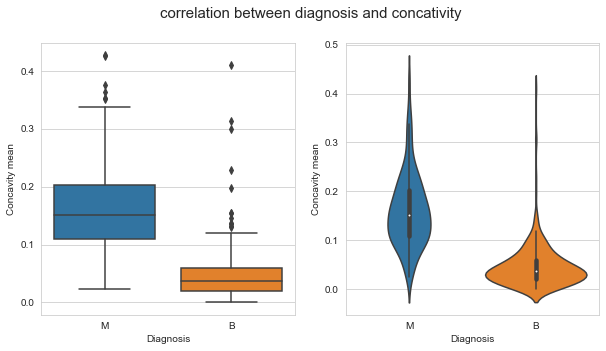

In [26]:
# Plotting 

plt.figure(figsize=(10,5))
plt.suptitle("correlation between diagnosis and concativity",fontsize=15)
plt.subplot(1,2,1)
sns.boxplot(x="diagnosis", y="concavity_mean", data=df)
plt.xlabel('Diagnosis',fontsize=10)
plt.ylabel("Concavity mean",fontsize=10)
plt.subplot(1,2,2)
sns.violinplot(x="diagnosis", y="concavity_mean", data=df)
plt.xlabel('Diagnosis',fontsize=10)
plt.ylabel("Concavity mean",fontsize=10)
plt.show()

###  Plotting Multivariate  relations between each pair of features  hue = "diagnosis"

#### PairPlot between Mean Features with Diagnosis

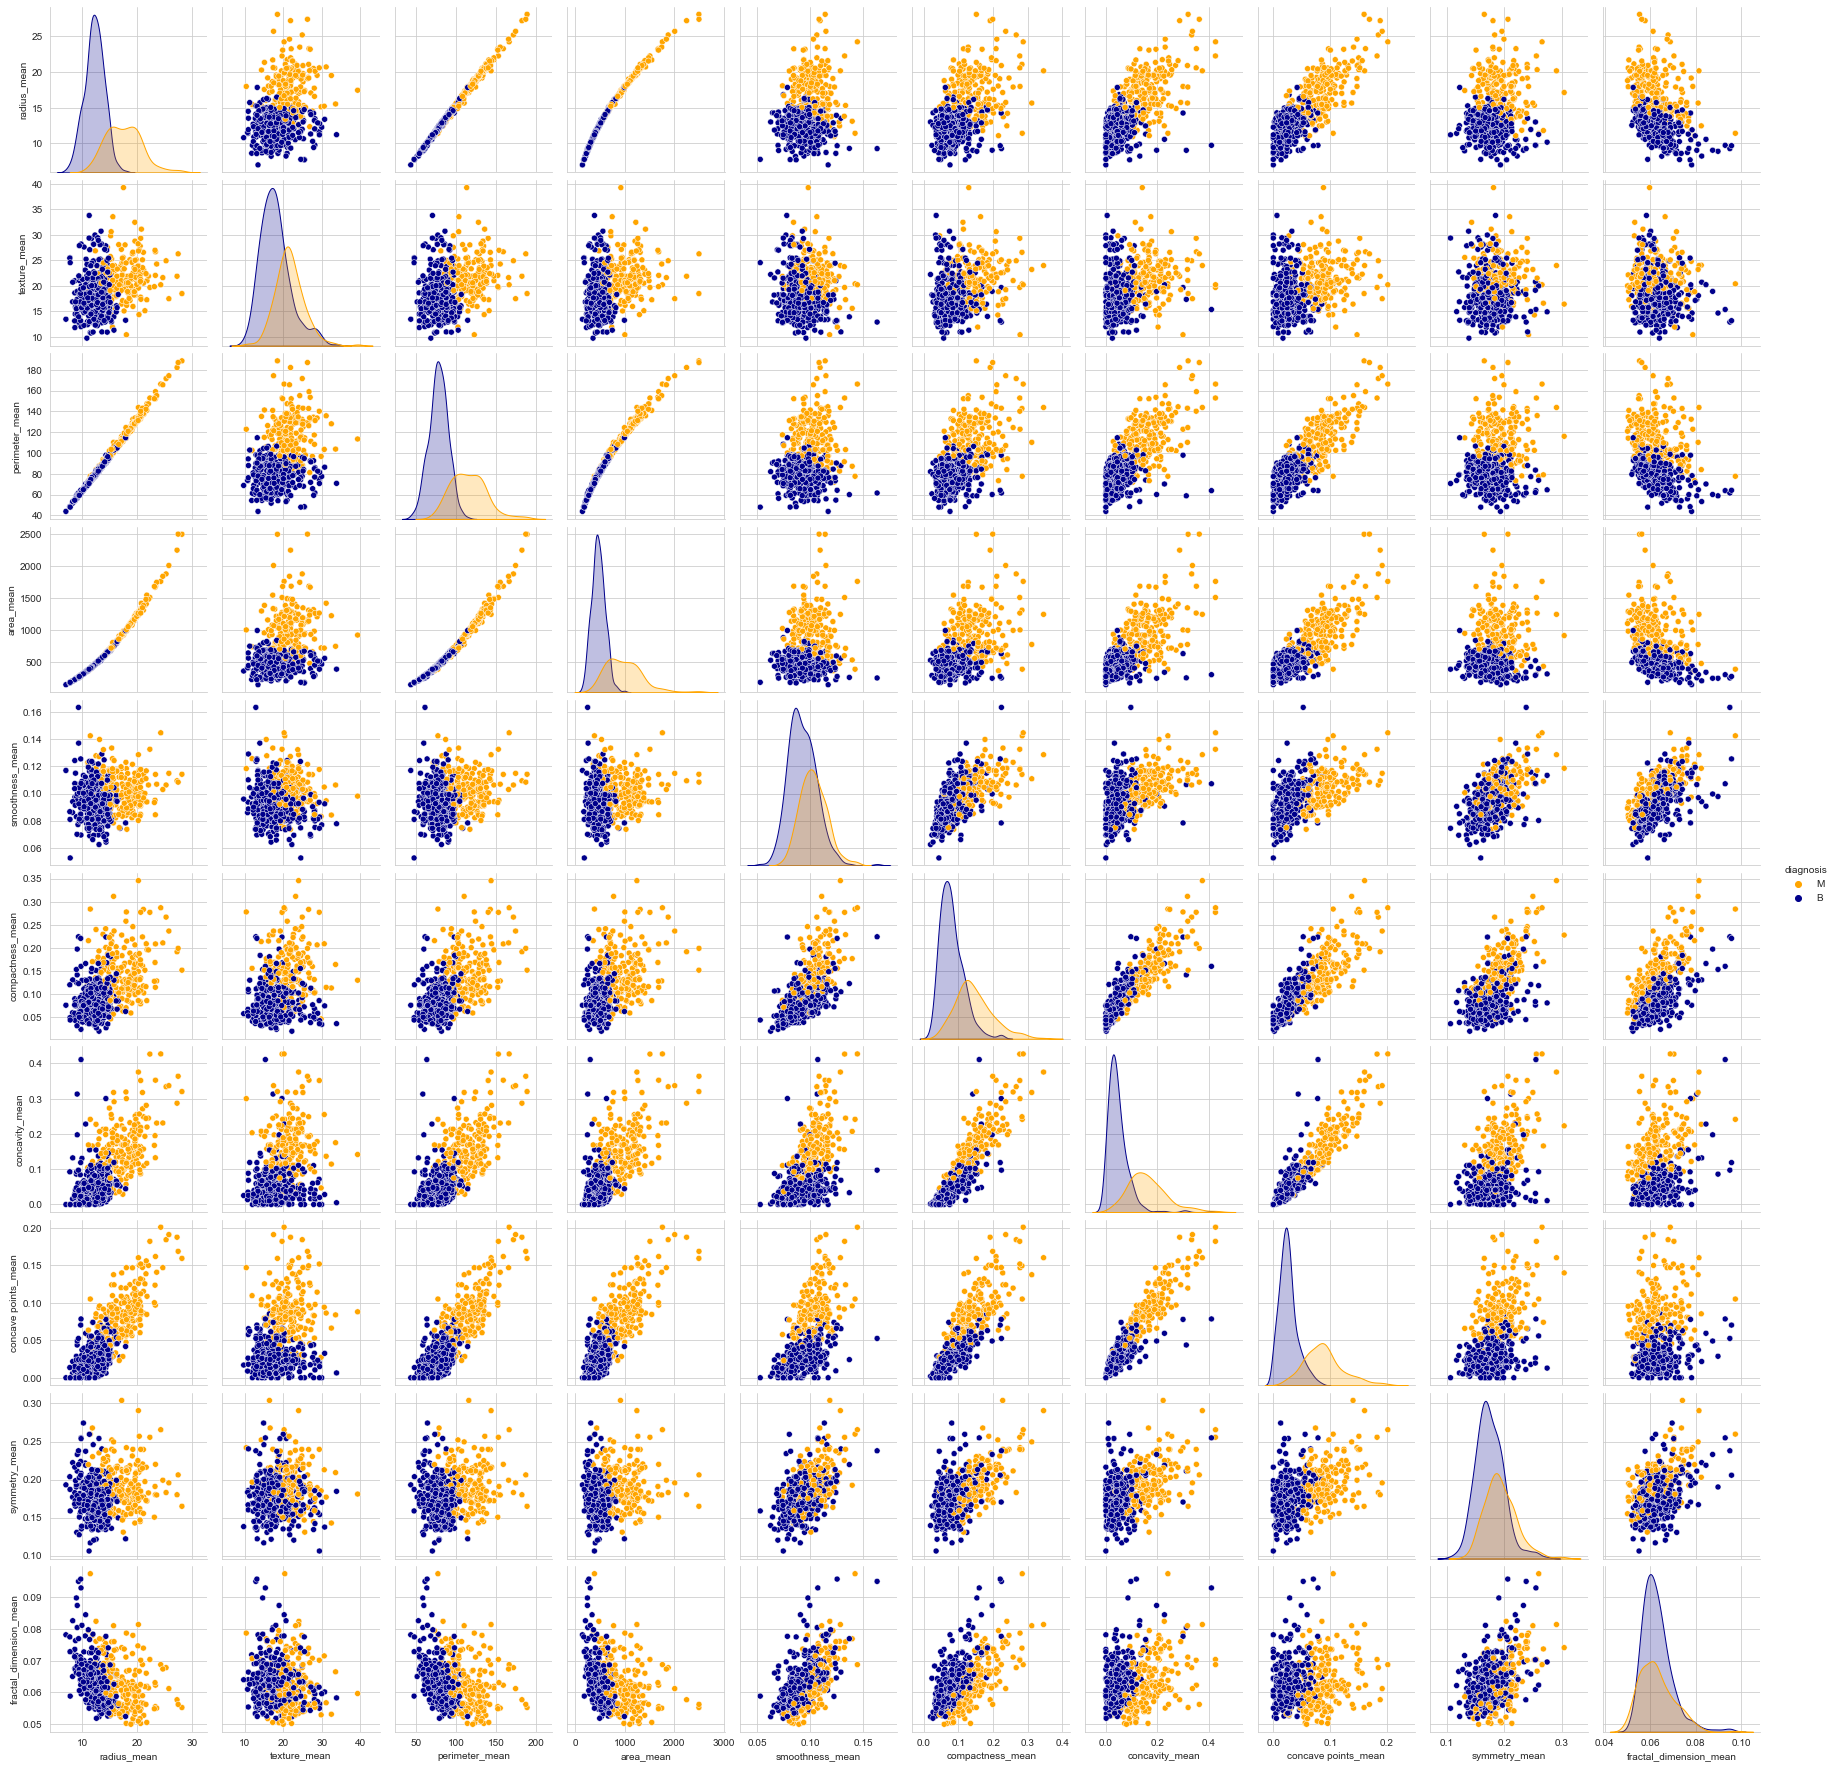

In [27]:
df_mean = df[['diagnosis',
        'radius_mean', 
        'texture_mean', 
        'perimeter_mean', 
        'area_mean', 
        'smoothness_mean', 
        'compactness_mean', 
        'concavity_mean',
        'concave points_mean', 
        'symmetry_mean', 
        'fractal_dimension_mean']]

sns.pairplot(data=df_mean, hue='diagnosis', palette=('Orange','DarkBlue'))


In [28]:
### Pairplot between Squared Error Features with Diagnosis

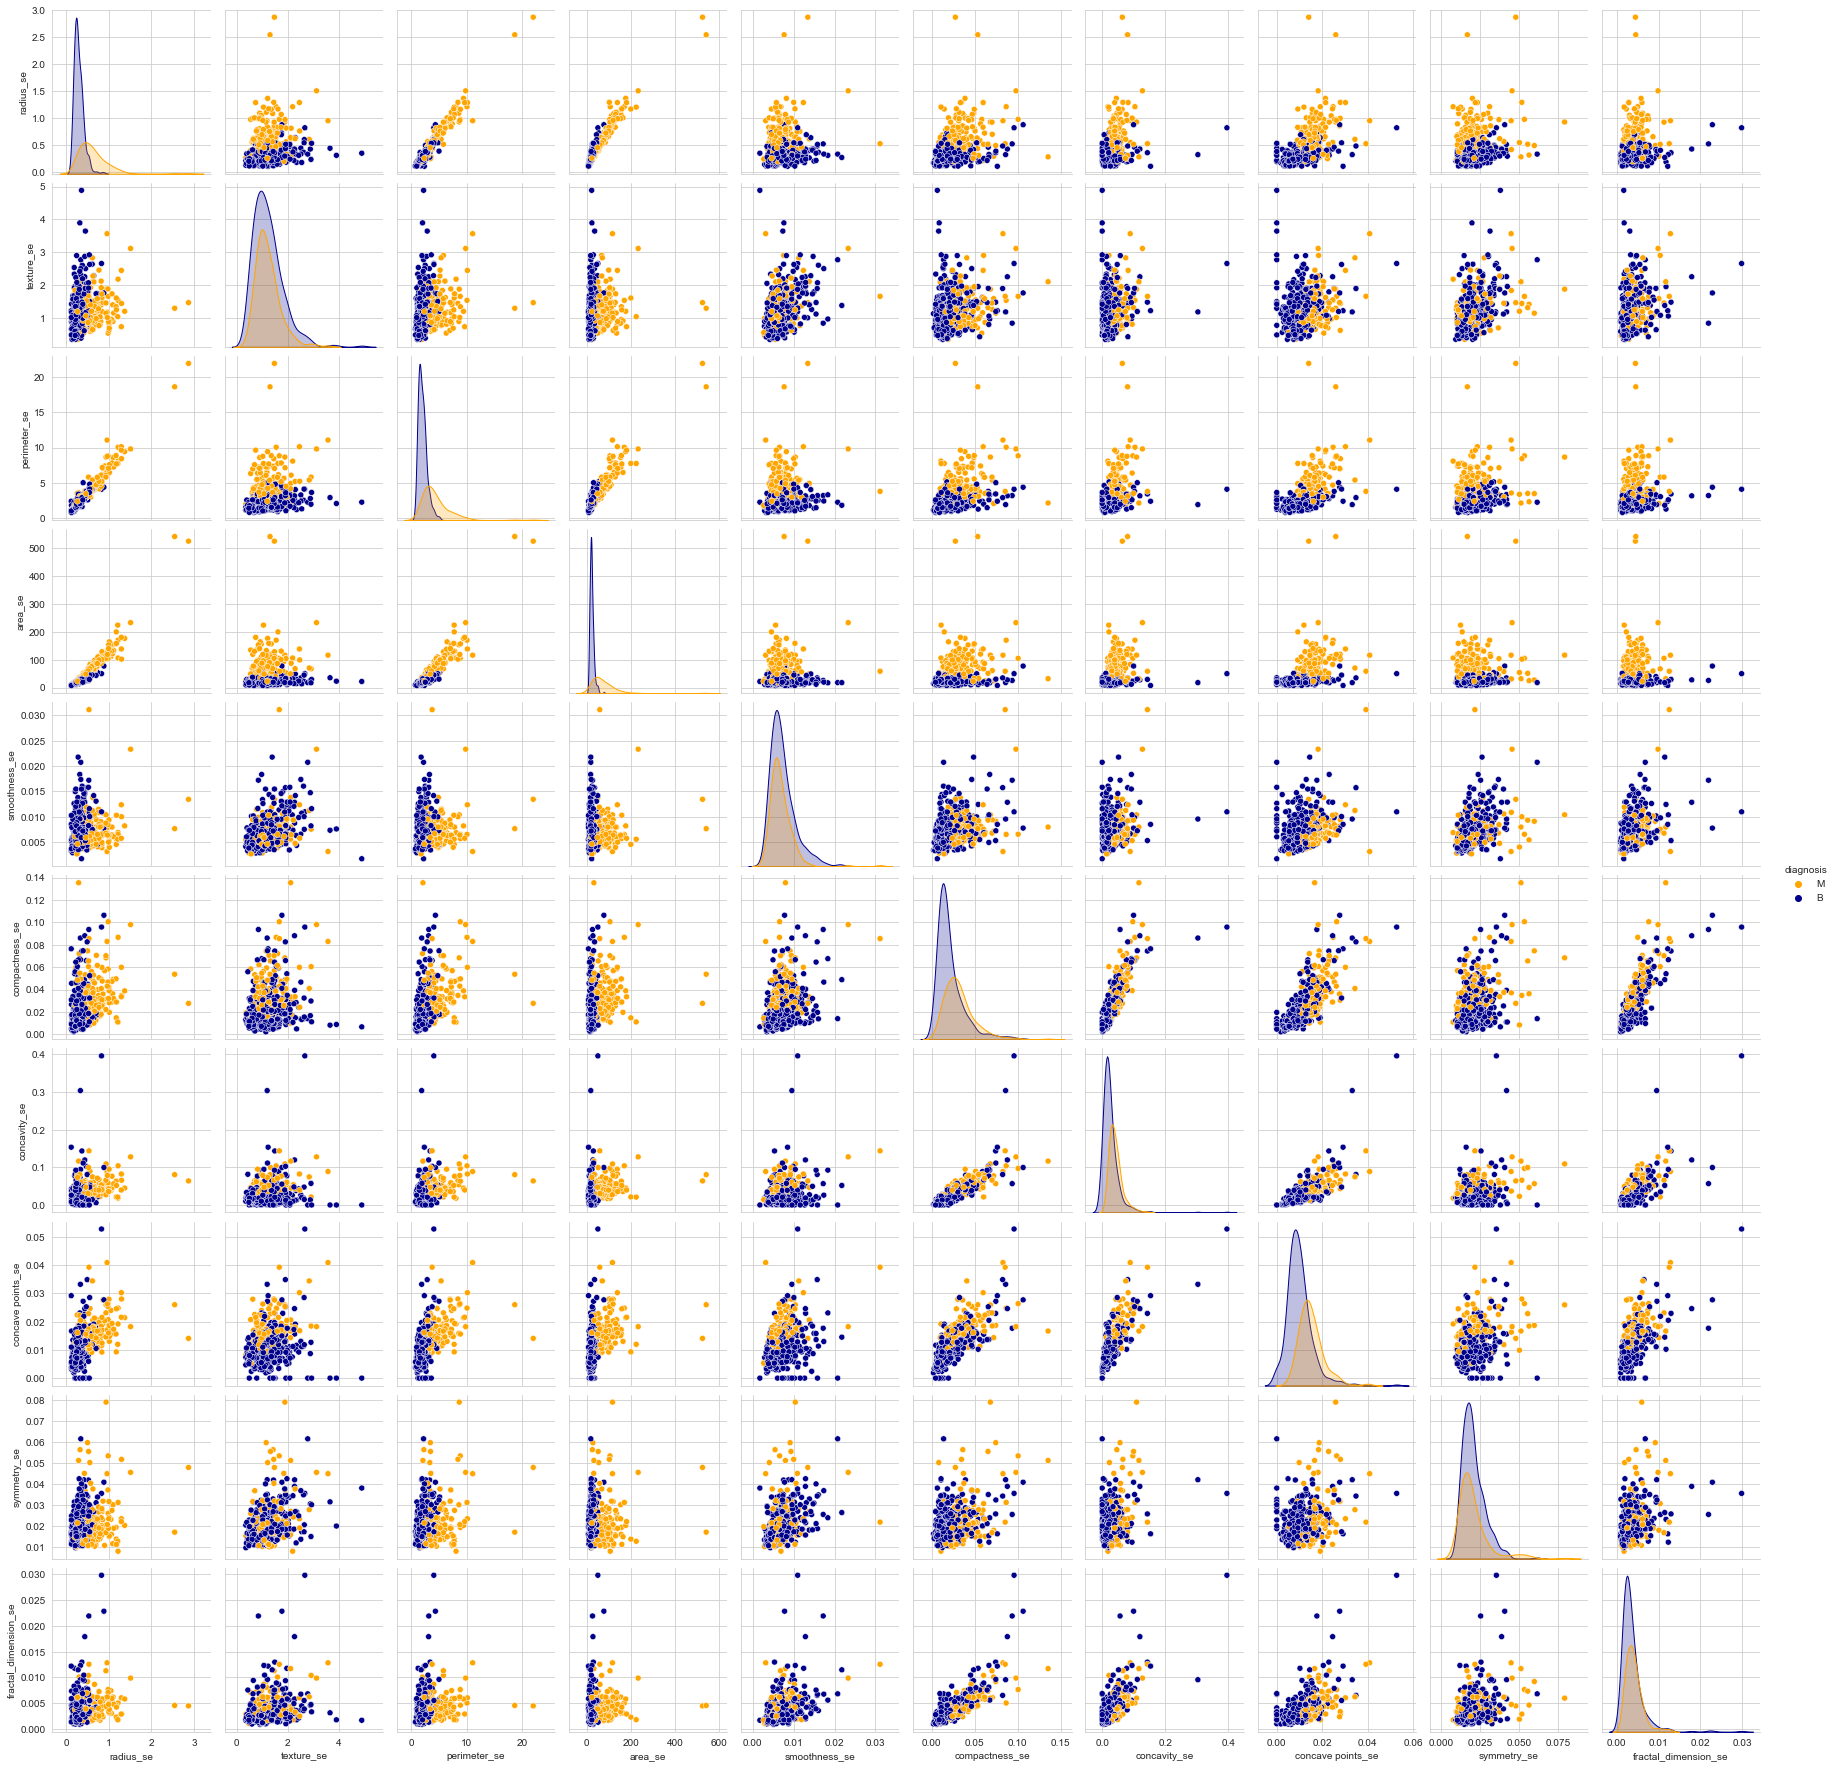

In [29]:
df_se = df[['diagnosis',
        'radius_se', 
        'texture_se', 
        'perimeter_se', 
        'area_se', 
        'smoothness_se', 
        'compactness_se', 
        'concavity_se',
        'concave points_se', 
        'symmetry_se', 
        'fractal_dimension_se']]
sns.pairplot(data=df_se, hue='diagnosis', palette=('Orange','DarkBlue'))


In [30]:
### Pairplot between  Worst Error Features with Diagnosis

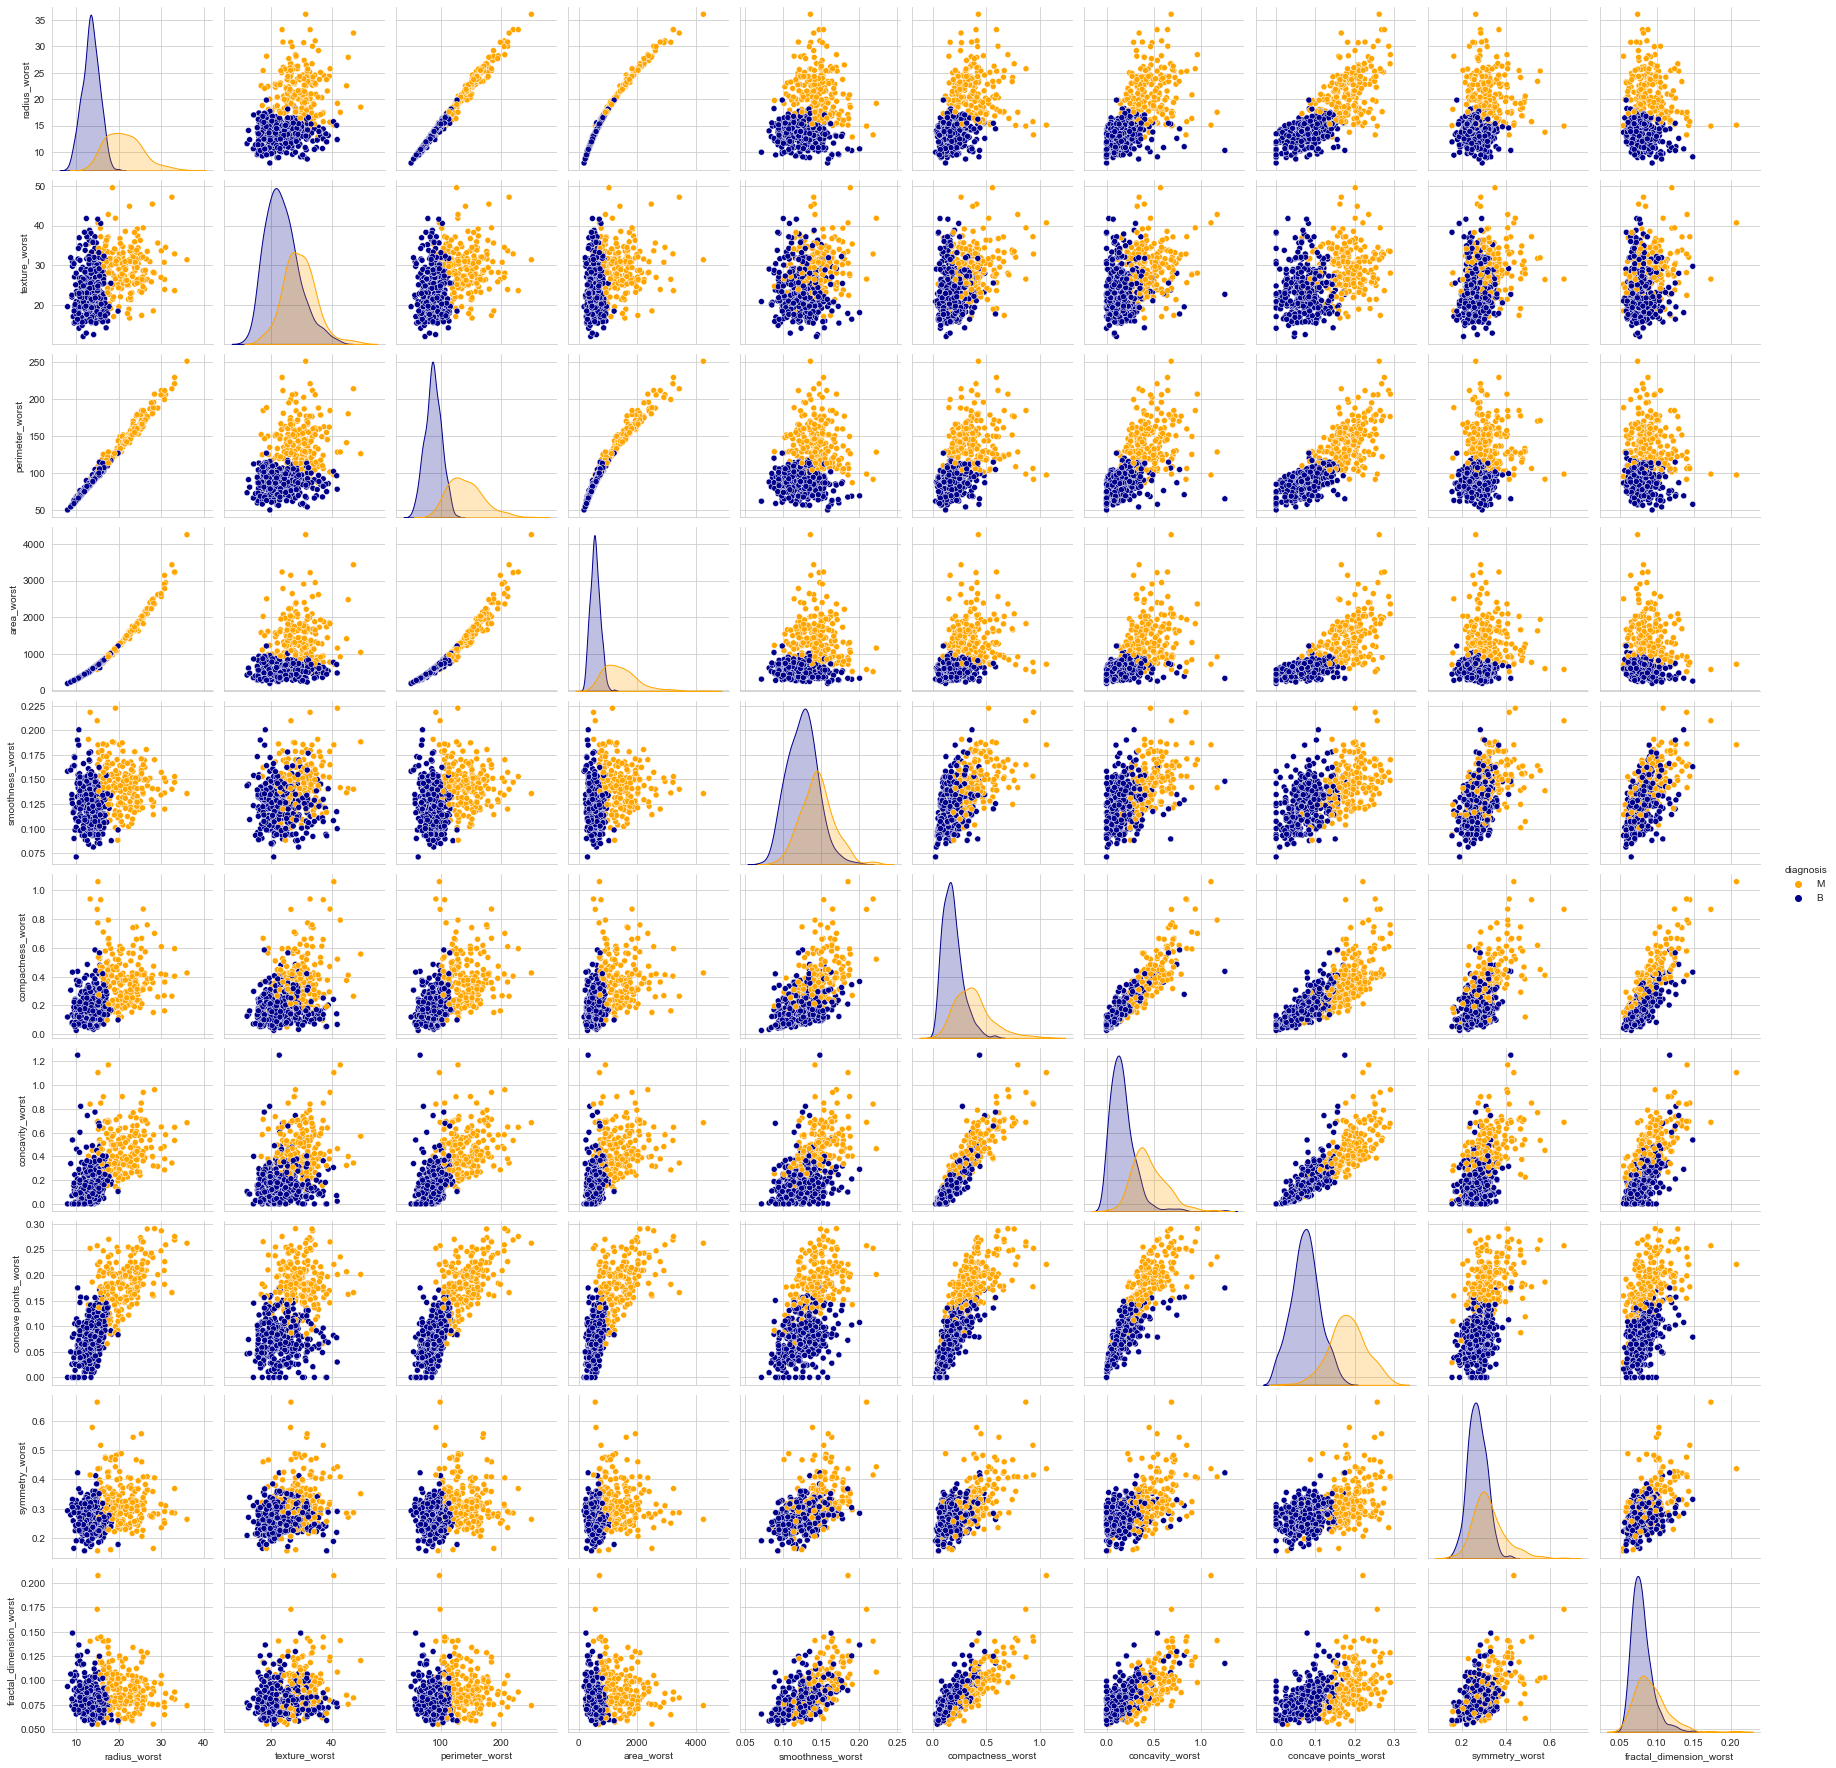

In [31]:
df_worst = df[['diagnosis',
        'radius_worst', 
        'texture_worst', 
        'perimeter_worst', 
        'area_worst', 
        'smoothness_worst', 
        'compactness_worst', 
        'concavity_worst',
        'concave points_worst', 
        'symmetry_worst', 
        'fractal_dimension_worst']]

sns.pairplot(data=df_worst, hue='diagnosis', palette=('Orange','DarkBlue'))


In [32]:
### Correlation Between Data

<AxesSubplot:title={'center':'Heatmap of Correlation matrix '}>

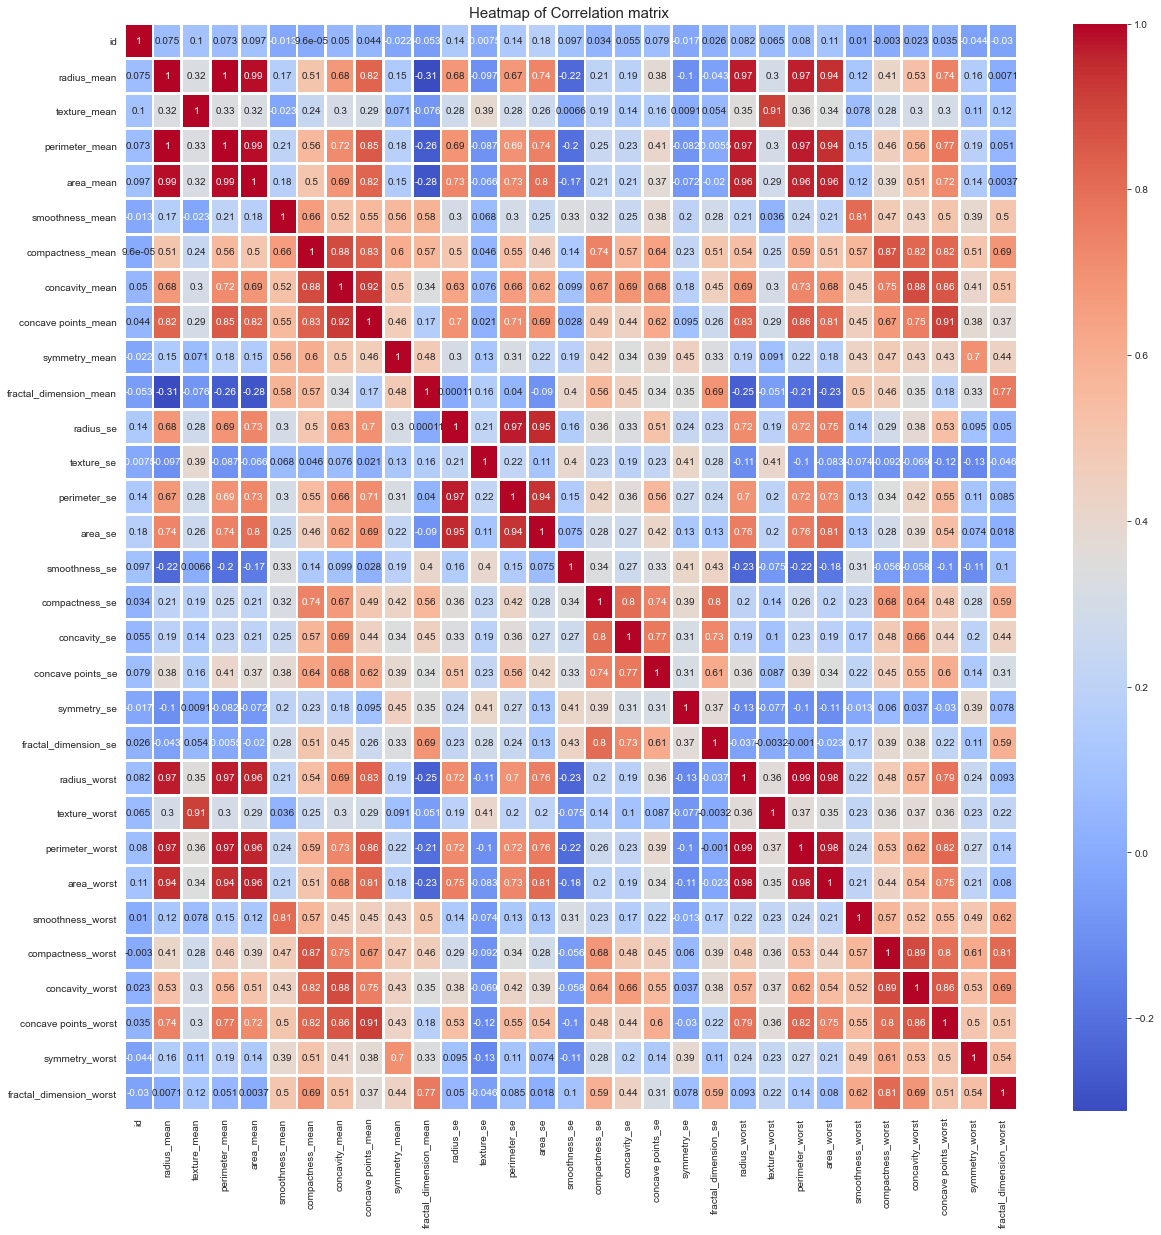

In [33]:
plt.figure(figsize=(20,20))
plt.title("Heatmap of Correlation matrix ",fontsize=15)
sns.heatmap(df.corr(), annot = True, cmap ='coolwarm', linewidths=2)

In [34]:
df.corr(method='spearman')

id  radius_mean  texture_mean  perimeter_mean  \
id                       1.000000     0.043740      0.125809        0.043374   
radius_mean              0.043740     1.000000      0.340956        0.997802   
texture_mean             0.125809     0.340956      1.000000        0.348142   
perimeter_mean           0.043374     0.997802      0.348142        1.000000   
area_mean                0.042829     0.999602      0.344145        0.997068   
smoothness_mean         -0.073225     0.148510      0.024649        0.182923   
compactness_mean        -0.002247     0.497578      0.266499        0.543925   
concavity_mean           0.000657     0.645728      0.342646        0.681958   
concave points_mean     -0.003174     0.759702      0.306891        0.788629   
symmetry_mean           -0.001102     0.120242      0.110130        0.150049   
fractal_dimension_mean  -0.087017    -0.349931     -0.059303       -0.304891   
radius_se               -0.016157     0.550247      0.363621        0.560326   
texture_se               0.032837    -0.144499      0.450720       -0.137578   
perimeter_se             0.002656     0.565520      0.386813        0.582789   
area_se                  0.002448     0.738077      0.395139        0.745824   
smoothness_se            0.020673    -0.326385      0.037048       -0.311147   
compactness_se           0.037236     0.264904      0.263591        0.308620   
concavity_se             0.029344     0.364555      0.287188        0.402277   
concave points_se        0.016625     0.410576      0.238610        0.441996   
symmetry_se             -0.028736    -0.241376      0.008945       -0.228187   
fractal_dimension_se    -0.020282    -0.008411      0.147605        0.032429   
radius_worst             0.025451     0.978604      0.366547        0.981244   
texture_worst            0.077484     0.314911      0.909218        0.323109   
perimeter_worst          0.026199     0.971555      0.375273        0.978980   
area_worst               0.023137     0.978863      0.368335        0.980864   
smoothness_worst        -0.080853     0.125789      0.101401        0.156611   
compactness_worst       -0.011300     0.491357      0.290917        0.534565   
concavity_worst         -0.013284     0.596043      0.339725        0.632106   
concave points_worst    -0.012798     0.727265      0.319235        0.757526   
symmetry_worst          -0.064977     0.174698      0.120693        0.199007   
fractal_dimension_worst -0.090637     0.044564      0.116144        0.088961   

                         area_mean  smoothness_mean  compactness_mean  \
id                        0.042829        -0.073225         -0.002247   
radius_mean               0.999602         0.148510          0.497578   
texture_mean              0.344145         0.024649          0.266499   
perimeter_mean            0.997068         0.182923          0.543925   
area_mean                 1.000000         0.138053          0.488988   
smoothness_mean           0.138053         1.000000          0.678806   
compactness_mean          0.488988         0.678806          1.000000   
concavity_mean            0.642557         0.518511          0.896518   
concave points_mean       0.755165         0.565172          0.848295   
symmetry_mean             0.113928         0.542228          0.552203   
fractal_dimension_mean   -0.358425         0.588465          0.499195   
radius_se                 0.553388         0.334282          0.506582   
texture_se               -0.142469         0.091283          0.047766   
perimeter_se              0.568237         0.331360          0.583520   
area_se                   0.741518         0.296059          0.539511   
smoothness_se            -0.327431         0.338692          0.127381   
compactness_se            0.260362         0.392455          0.817875   
concavity_se              0.362308         0.354730          0.772283   
concave points_se         0.406468         0.438826          0.732425   
symmetry_s

## Data Preprocessing -
### Feature elemination

In [35]:
# feature is not for our use as it consist of id of the patient
df.drop('id',axis=1,inplace= True) 

In [36]:
df.isnull().sum().sum()

0

### Feature encoding 

In [38]:
le = preprocessing.LabelEncoder()
df['diagnosis']=le.fit_transform(df['diagnosis'])

In [39]:
df['diagnosis'].unique()

array([1, 0])

In [40]:
df.head()

diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0          1        17.99         10.38          122.80     1001.0   
1          1        20.57         17.77          132.90     1326.0   
2          1        19.69         21.25          130.00     1203.0   
3          1        11.42         20.38           77.58      386.1   
4          1        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   symmetry_mean  fractal_dimension_mean  radius_se  texture_se  perimeter_se  \
0         0.2419                 0.07871     1.0950      0.9053         8.589   
1         0.1812                 0.05667     0.5435      0.7339         3.398   
2         0.2069                 0.05999     0.7456      0.7869         4.585   
3         0.2597                 0.09744     0.4956      1.1560         3.445   
4         0.1809                 0.05883     0.7572      0.7813         5.438   

   area_se  smoothness_se  compactness_se  concavity_se  concave points_se  \
0   153.40       0.006399         0.04904       0.05373            0.01587   
1    74.08       0.005225         0.01308       0.01860            0.01340   
2    94.03       0.006150         0.04006       0.03832            0.02058   
3    27.23       0.009110         0.07458       0.05661            0.01867   
4    94.44       0.011490         0.02461       0.05688            0.01885   

   symmetry_se  fractal_dimension_se  radius_worst  texture_worst  \
0      0.03003              0.006193         25.38          17.33   
1      0.01389              0.003532         24.99          23.41   
2      0.02250              0.004571         23.57          25.53   
3      0.05963              0.009208         14.91          26.50   
4      0.01756              0.005115         22.54          16.67   

   perimeter_worst  area_worst  smoothness_worst  compactness_worst  \
0           184.60      2019.0            0.1622             0.6656   
1           158.80      1956.0            0.1238             0.1866   
2           152.50      1709.0            0.1444             0.4245   
3            98.87       567.7            0.2098             0.8663   
4           152.20      1575.0            0.1374             0.2050   

   concavity_worst  concave points_worst  symmetry_worst  \
0           0.7119                0.2654          0.4601   
1           0.2416                0.1860          0.2750   
2           0.4504                0.2430          0.3613   
3           0.6869                0.2575          0.6638   
4           0.4000                0.1625          0.2364   

   fractal_dimension_worst  
0                  0.11890  
1                  0.08902  
2                  0.08758  
3                  0.17300  
4                  0.07678

#### Now our data is ready to pass the model and perform ML building.

In [41]:
cancer_pos_rate = np.sum(df.diagnosis) / len(df.diagnosis) *100
print('Breast Cancer +ve rate - ',cancer_pos_rate)

Breast Cancer +ve rate -  37.258347978910365


##### The given dataset contains only 3.7 % of cancer +ve data which is balance data for building accurate model.

## Spliting Dataset for Feature Selection of Model Building

In [42]:
data = df.copy()
data.head()

diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0          1        17.99         10.38          122.80     1001.0   
1          1        20.57         17.77          132.90     1326.0   
2          1        19.69         21.25          130.00     1203.0   
3          1        11.42         20.38           77.58      386.1   
4          1        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   symmetry_mean  fractal_dimension_mean  radius_se  texture_se  perimeter_se  \
0         0.2419                 0.07871     1.0950      0.9053         8.589   
1         0.1812                 0.05667     0.5435      0.7339         3.398   
2         0.2069                 0.05999     0.7456      0.7869         4.585   
3         0.2597                 0.09744     0.4956      1.1560         3.445   
4         0.1809                 0.05883     0.7572      0.7813         5.438   

   area_se  smoothness_se  compactness_se  concavity_se  concave points_se  \
0   153.40       0.006399         0.04904       0.05373            0.01587   
1    74.08       0.005225         0.01308       0.01860            0.01340   
2    94.03       0.006150         0.04006       0.03832            0.02058   
3    27.23       0.009110         0.07458       0.05661            0.01867   
4    94.44       0.011490         0.02461       0.05688            0.01885   

   symmetry_se  fractal_dimension_se  radius_worst  texture_worst  \
0      0.03003              0.006193         25.38          17.33   
1      0.01389              0.003532         24.99          23.41   
2      0.02250              0.004571         23.57          25.53   
3      0.05963              0.009208         14.91          26.50   
4      0.01756              0.005115         22.54          16.67   

   perimeter_worst  area_worst  smoothness_worst  compactness_worst  \
0           184.60      2019.0            0.1622             0.6656   
1           158.80      1956.0            0.1238             0.1866   
2           152.50      1709.0            0.1444             0.4245   
3            98.87       567.7            0.2098             0.8663   
4           152.20      1575.0            0.1374             0.2050   

   concavity_worst  concave points_worst  symmetry_worst  \
0           0.7119                0.2654          0.4601   
1           0.2416                0.1860          0.2750   
2           0.4504                0.2430          0.3613   
3           0.6869                0.2575          0.6638   
4           0.4000                0.1625          0.2364   

   fractal_dimension_worst  
0                  0.11890  
1                  0.08902  
2                  0.08758  
3                  0.17300  
4                  0.07678

In [43]:
data.shape,data.isnull().sum().sum()

((569, 31), 0)

#### The process dataset contain 569 instance ,31 columns including target variable and zero null values

In [45]:
X =data.drop(['diagnosis'],axis = 1)
y = data['diagnosis']

In [46]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)

#### Data is split into train and testing part

In [47]:
X_train.shape , X_test.shape, y_train.shape, y_test.shape

((398, 30), (171, 30), (398,), (171,))

#### Calculating the feature correlated to Target variable

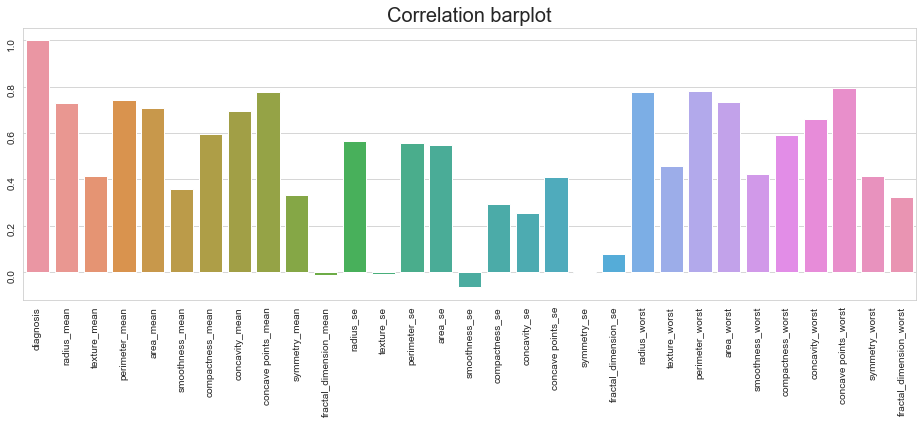

In [52]:
plt.figure(figsize = (16,5))
plt.title("Correlation barplot",fontsize= 20)
ax = sns.barplot(data.corrwith(df.diagnosis).index, data.corrwith(data.diagnosis))

ax.tick_params(labelrotation = 90)

#### from the above figure we can say that concave points_worst,radius_worst,perimeter_worst,concave points_means contributes toward target varibale more than other features